In [4]:
import matplotlib.pyplot as plt
import importlib.util
import pandas as pd
import numpy as np
import h5py
import tables
import tensorflow as tf
from crashpy.dataclasses.simulation import LoadedSimulation as Sim
from get_spectrum import get_spectra
from build_df import *
import ipyvolume as ipv

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:

import crashpy

In [7]:
import matplotlib
plt.rcParams["figure.figsize"] = (20,30)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [10]:
simname = 'L35n2160TNG'
# load the config module for the fiducial 2 dust configuration
spec_dust = importlib.util.spec_from_file_location("module.name","/freya/ptmp/mpa/mglatzle/TNG_f_esc/fid2d/config.py")
config_dust = importlib.util.module_from_spec(spec_dust)
spec_dust.loader.exec_module(config_dust)

# load the config module for the fiducial 2 no dust configuration
spec_no_dust = importlib.util.spec_from_file_location("module.name","/freya/ptmp/mpa/mglatzle/TNG_f_esc/fid2/config.py")
config_no_dust = importlib.util.module_from_spec(spec_no_dust)
spec_no_dust.loader.exec_module(config_no_dust)

halos = construct_halo_dict(simname, [config_no_dust, config_dust], with_dust=True)

An error occured in /freya/ptmp/mpa/mglatzle/TNG_f_esc/fid2d/run/L35n2160TNG/sn013/g40


In [98]:
input_df = halos['dust']['sn013']['df']
for ID in halos['no_dust']['sn013']['IDs']:
    try:
        if not int(input_df.loc[ID, ('csim_path', 0)].split('/')[-1][1:])==ID:
            print('wambo')
    except:
        pass
        #print(input_df.loc[ID, ('csim_path', 0)])

In [89]:
for ID in halos['dust']['sn013']['IDs']:
    if ID==190:
        print(ID)
        print(df.loc[ID, ('csim_path', 0)])

190
/freya/ptmp/mpa/mglatzle/TNG_f_esc/fid2d/run/L35n2160TNG/sn013/g190


In [71]:
for ID in halos['no_dust']['sn013']['IDs']:
    if not ID == int(df.loc[ID][('csim_path', 0)].split('/')[10][1:]):
        print(ID)

In [84]:
df = halos['dust']['sn013']['df']

In [79]:
df.iloc[117][(              'csim_path', 0)]

'/freya/ptmp/mpa/mglatzle/TNG_f_esc/fid2/run/L35n2160TNG/sn013/g351'

In [39]:
df2 = halos['no_dust']['sn008']['df']

In [42]:
df3 = halos['no_dust']['sn004']['df']

In [52]:
df.iloc[190][(              'csim_path', 0)]

'/freya/ptmp/mpa/mglatzle/TNG_f_esc/fid2/run/L35n2160TNG/sn013/g542'

In [43]:
df.dropna(subset=[('f_esc', 4)], inplace=True)
df2.dropna(subset=[('f_esc', 4)], inplace=True)
df3.dropna(subset=[('f_esc', 4)], inplace=True)
0.022578

In [85]:
print(df.iloc[117][('f_esc', 0)]['5.0e-2']['1.0e0']['cum'])
print(df.iloc[117][('f_esc', 1)]['5.0e-2']['1.0e0']['cum'])
print(df.iloc[117][('f_esc', 2)]['5.0e-2']['1.0e0']['cum'])
print(df.iloc[117][('f_esc', 3)]['5.0e-2']['1.0e0']['cum'])
print(df.iloc[117][('f_esc', 4)]['5.0e-2']['1.0e0']['cum'])

0.0215920757381232
0.02304004162422789
0.023122857127239434
0.023057948501439548
0.022578418499853564


In [15]:
df.columns

MultiIndex([(            'GroupBHMass', 0),
            (            'GroupBHMdot', 0),
            (                'GroupCM', 0),
            (                'GroupCM', 1),
            (                'GroupCM', 2),
            (          'GroupFirstSub', 0),
            ( 'GroupGasMetalFractions', 0),
            ( 'GroupGasMetalFractions', 1),
            ( 'GroupGasMetalFractions', 2),
            ( 'GroupGasMetalFractions', 3),
            ( 'GroupGasMetalFractions', 4),
            ( 'GroupGasMetalFractions', 5),
            ( 'GroupGasMetalFractions', 6),
            ( 'GroupGasMetalFractions', 7),
            ( 'GroupGasMetalFractions', 8),
            ( 'GroupGasMetalFractions', 9),
            (    'GroupGasMetallicity', 0),
            (               'GroupLen', 0),
            (           'GroupLenType', 0),
            (           'GroupLenType', 1),
            (           'GroupLenType', 2),
            (           'GroupLenType', 3),
            (           'GroupLe

In [34]:
len(df)

1263

In [74]:
for setting in ['dust', 'no_dust']:
    for i,snapshot in enumerate(halos[setting].keys()):
        print(i)
        print(snapshot)

0
sn013
1
sn008
2
sn004
0
sn013
1
sn008
2
sn004


In [3]:
df_dust = halos['dust']['sn013']['df']
df_dust.dropna(subset=[('f_esc', 4)], inplace=True)

NameError: name 'halos' is not defined

In [ ]:
df_no_dust = halos['no_dust']['sn013']['df']
df_no_dust.dropna(subset=[('f_esc', 4)], inplace=True)

In [1]:
df = df_no_dust

NameError: name 'df_no_dust' is not defined

In [77]:
f_esc = []
for ind in df_no_dust.index: 
    f_esc.append(df_no_dust.loc[ind,('f_esc',4)]['5.0e-2']['1.0e0']['cum'])
df_no_dust['escape']=f_esc

In [80]:
print(np.average(df_dust[('f_esc',4)]))
print(np.average(df_no_dust['escape']))

0.06737806188543555
0.08556743545959716


In [46]:
df2['escape']

33         0.02919576204072325
40        0.036234167556645484
46        0.028437295369315014
49        0.026337502948369024
58         0.01908403239129148
                  ...         
68232       0.1008193989622515
68462     0.005816111103528034
76621     0.010943025407585044
103325      0.4450031924089545
123673      0.2449520614642246
Name: escape, Length: 1264, dtype: object

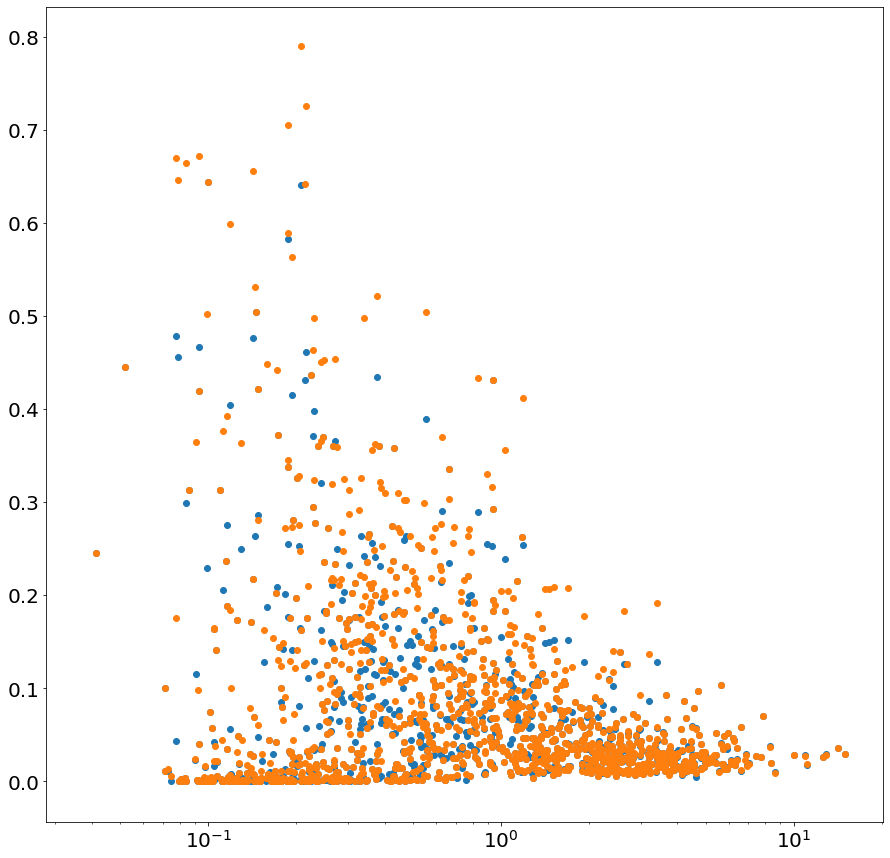

In [51]:
plt.scatter(df1[('GroupMass', 0)],df1[('f_esc', 0)])
plt.scatter(df2[('GroupMass', 0)],df2['escape'])
plt.rcParams["figure.figsize"] = (15,15)
plt.xscale('log')

In [19]:
halos['dust']['sn013']['df'][('f_esc', 0)][13393]['5.0e-2']['1.0e0']['n_iterations']

array(2)

In [27]:
a = halos['dust']['sn013']['df']['M_star']
b = halos['dust']['sn013']['df'][('GroupMassType', 4)]

In [53]:
a.notnull()

,0
0,True
1,True
2,True
3,True
4,True
...,...
303004,False
328352,False
333255,False
336570,False


In [64]:
a = df[df['M_star',0].notnull()]['M_star',0]

In [65]:
b = df[df[('M_star',0)].notnull()][('GroupMassType', 4)]

In [81]:
test = pd.DataFrame({'star':a, 'group':b})

In [82]:
test

,star,group
0,2.808348,2.847303
1,1.788926,1.787991
2,0.344360,0.376559
3,0.346107,0.370156
4,0.289435,0.315948
...,...,...
49992,0.000053,0.000069
50177,0.000065,0.000069
64873,0.000079,0.000079
76621,0.000081,0.000081


In [83]:
np.array(test)

array([[2.80834794e+00, 2.84730268e+00],
       [1.78892612e+00, 1.78799093e+00],
       [3.44360113e-01, 3.76558930e-01],
       [3.46106708e-01, 3.70156437e-01],
       [2.89434820e-01, 3.15947741e-01],
       [6.10159457e-01, 6.14423752e-01],
       [2.01867080e+00, 2.02215767e+00],
       [1.14041440e-01, 1.55210435e-01],
       [6.18144155e-01, 6.21554434e-01],
       [2.04819828e-01, 1.96130380e-01],
       [1.68490574e-01, 1.91419721e-01],
       [3.03613007e-01, 3.01873267e-01],
       [9.97810438e-02, 1.20822117e-01],
       [9.59854722e-02, 1.14423536e-01],
       [7.16968179e-02, 1.31541640e-01],
       [7.81211853e-02, 1.59561217e-01],
       [4.62268561e-01, 4.68260527e-01],
       [1.40873343e-01, 1.60793558e-01],
       [4.86071914e-01, 4.84877437e-01],
       [6.19955435e-02, 8.93880948e-02],
       [3.28501225e-01, 3.27676982e-01],
       [1.29163533e-01, 1.29997090e-01],
       [2.06902772e-01, 2.09183067e-01],
       [1.97565407e-01, 1.95569843e-01],
       [7.094477

In [68]:
(a-b)

0        -3.895473e-02
1         9.351969e-04
2        -3.219882e-02
3        -2.404973e-02
4        -2.651292e-02
              ...     
49992    -1.590734e-05
50177    -4.370813e-06
64873     0.000000e+00
76621     7.275958e-12
123673    0.000000e+00
Length: 342, dtype: float64

In [48]:
df[df[('M_star',0)].notnull()][('GroupMassType', 4)].describe()

count    342.000000
mean       0.050597
std        0.223926
min        0.000069
25%        0.000451
50%        0.003464
75%        0.024138
max        2.847303
Name: (GroupMassType, 4), dtype: float64

In [17]:
halos['dust']['sn013']['df'].keys()

MultiIndex([(            'GroupBHMass', 0),
            (            'GroupBHMdot', 0),
            (                'GroupCM', 0),
            (                'GroupCM', 1),
            (                'GroupCM', 2),
            (          'GroupFirstSub', 0),
            ( 'GroupGasMetalFractions', 0),
            ( 'GroupGasMetalFractions', 1),
            ( 'GroupGasMetalFractions', 2),
            ( 'GroupGasMetalFractions', 3),
            ( 'GroupGasMetalFractions', 4),
            ( 'GroupGasMetalFractions', 5),
            ( 'GroupGasMetalFractions', 6),
            ( 'GroupGasMetalFractions', 7),
            ( 'GroupGasMetalFractions', 8),
            ( 'GroupGasMetalFractions', 9),
            (    'GroupGasMetallicity', 0),
            (               'GroupLen', 0),
            (           'GroupLenType', 0),
            (           'GroupLenType', 1),
            (           'GroupLenType', 2),
            (           'GroupLenType', 3),
            (           'GroupLe

In [59]:
halos['dust']['sn008']['df'][('f_esc', 0)][24620]['5.0e-2']['1.0e0'].keys()#['per_source']

dict_keys(['chunk_size', 'cum', 'emitted_photons', 'escaped_photons', 'freqs', 'n_iterations', 'per_freq', 'per_source'])

In [62]:
halos['dust']['sn008']['df'][('f_esc', 0)][24620]['5.0e-2']['1.0e0']['chunk_size']

array(1000.)

In [107]:
emitted_photons = halos['dust']['sn013']['df'][('f_esc', 0)][13393]['5.0e-2']['1.0e0']['emitted_photons'][:,:]

In [108]:
escaped_photons = halos['dust']['sn013']['df'][('f_esc', 0)][13393]['5.0e-2']['1.0e0']['escaped_photons'][:,:]

In [109]:
a = escaped_photons.sum()/emitted_photons.sum()

In [110]:
a

0.00027177379497926184

In [106]:
halos['dust']['sn013']['df'][('f_esc', 0)][13393]['5.0e-2']['1.0e0']['cum']

array(0.00027177)

In [102]:
escaped_photons = halos['dust']['sn013']['df'][('f_esc', 0)][13393]['5.0e-2']['1.0e0']['per_source'][10]

In [103]:
escaped_photons

8.32700556570074e-11

In [94]:
halos['dust']['sn013']['df'][('f_esc', 0)][13393]['5.0e-2']['1.0e0']['per_source'].shape

(46,)

In [92]:
halos['dust']['sn013']['df'][('f_esc', 0)][13393]['5.0e-2']['1.0e0']['per_freq'].shape

(65,)

In [6]:
figure, subfigs = plt.subplots(len(halos['dust'].keys()))
for i,snap in enumerate(halos['dust'].keys()):
    print(snap)
    for j,setting in enumerate(halos.keys()):
        mass = []
        f_esc = []
        for ID in halos[setting][snap]['IDs']:
            element_f_esc = halos[setting][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['cum']
            element_mass = halos[setting][snap]['df'].loc[ID, ('GroupMass',0)]
            f_esc.append(element_f_esc)
            mass.append(element_mass)
            
        if setting == 'dust':
            f_esc_dust = f_esc
            mass_dust = mass
        elif setting == 'no_dust': 
            f_esc_no_dust = f_esc
            mass_no_dust = mass
    subfigs[i].scatter(mass_dust,f_esc_dust, label='dust')
    subfigs[i].scatter(mass_no_dust,f_esc_no_dust, label='no dust')
    subfigs[i].set_xscale('log')
    subfigs[i].set_xlabel('Group Mass [$10^{10}M_{\mathrm{sun}}$]', size='25')
    subfigs[i].set_ylabel('$f_{esc}$', size='25')
    subfigs[i].legend(fontsize=20)
    title = f'z={z[i]}'
    subfigs[i].set_title(title,fontsize=30)
plt.show();

NameError: name 'halos' is not defined

In [7]:
figure, subfigs = plt.subplots(len(halos['dust'].keys()))
for i,snap in enumerate(halos['dust'].keys()):
    dust_ids = set(halos['dust'][snap]['IDs'])
    no_dust_ids = set(halos['dust'][snap]['IDs'])
    IDs = list(dust_ids.intersection(no_dust_ids))
        
    for j,setting in enumerate(halos.keys()):
        mass = []
        f_esc = []
        for ID in IDs:
            element_f_esc = halos[setting][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['cum']
            element_mass = halos[setting][snap]['df'].loc[ID, ('GroupMass',0)]
            f_esc.append(element_f_esc)
            mass.append(element_mass)
            
        if setting == 'dust':
            f_esc_dust = np.array(f_esc)
        elif setting == 'no_dust': 
            f_esc_no_dust = np.array(f_esc)

    subfigs[i].scatter(np.array(mass),(f_esc_no_dust-f_esc_dust)/f_esc_no_dust)
    mass, esc_diff = zip(*sorted(zip(mass, (f_esc_no_dust-f_esc_dust)/f_esc_no_dust)))
    subfigs[i].plot(mass, esc_diff)
    subfigs[i].set_xscale('log')
    subfigs[i].set_xlabel('Group Mass [$10^{10}M_{\mathrm{sun}}$]', size='25')
    subfigs[i].set_ylabel(r'$\frac{f_{\mathrm{esc}_{\mathrm{no\_dust}}}-f_{\mathrm{esc}_{\mathrm{dust}}}}{f_{\mathrm{esc}_{\mathrm{no\_dust}}}}$', size='30')
    title = f'z={z[i]}'
    subfigs[i].set_title(title,fontsize=30)
plt.show();

NameError: name 'halos' is not defined

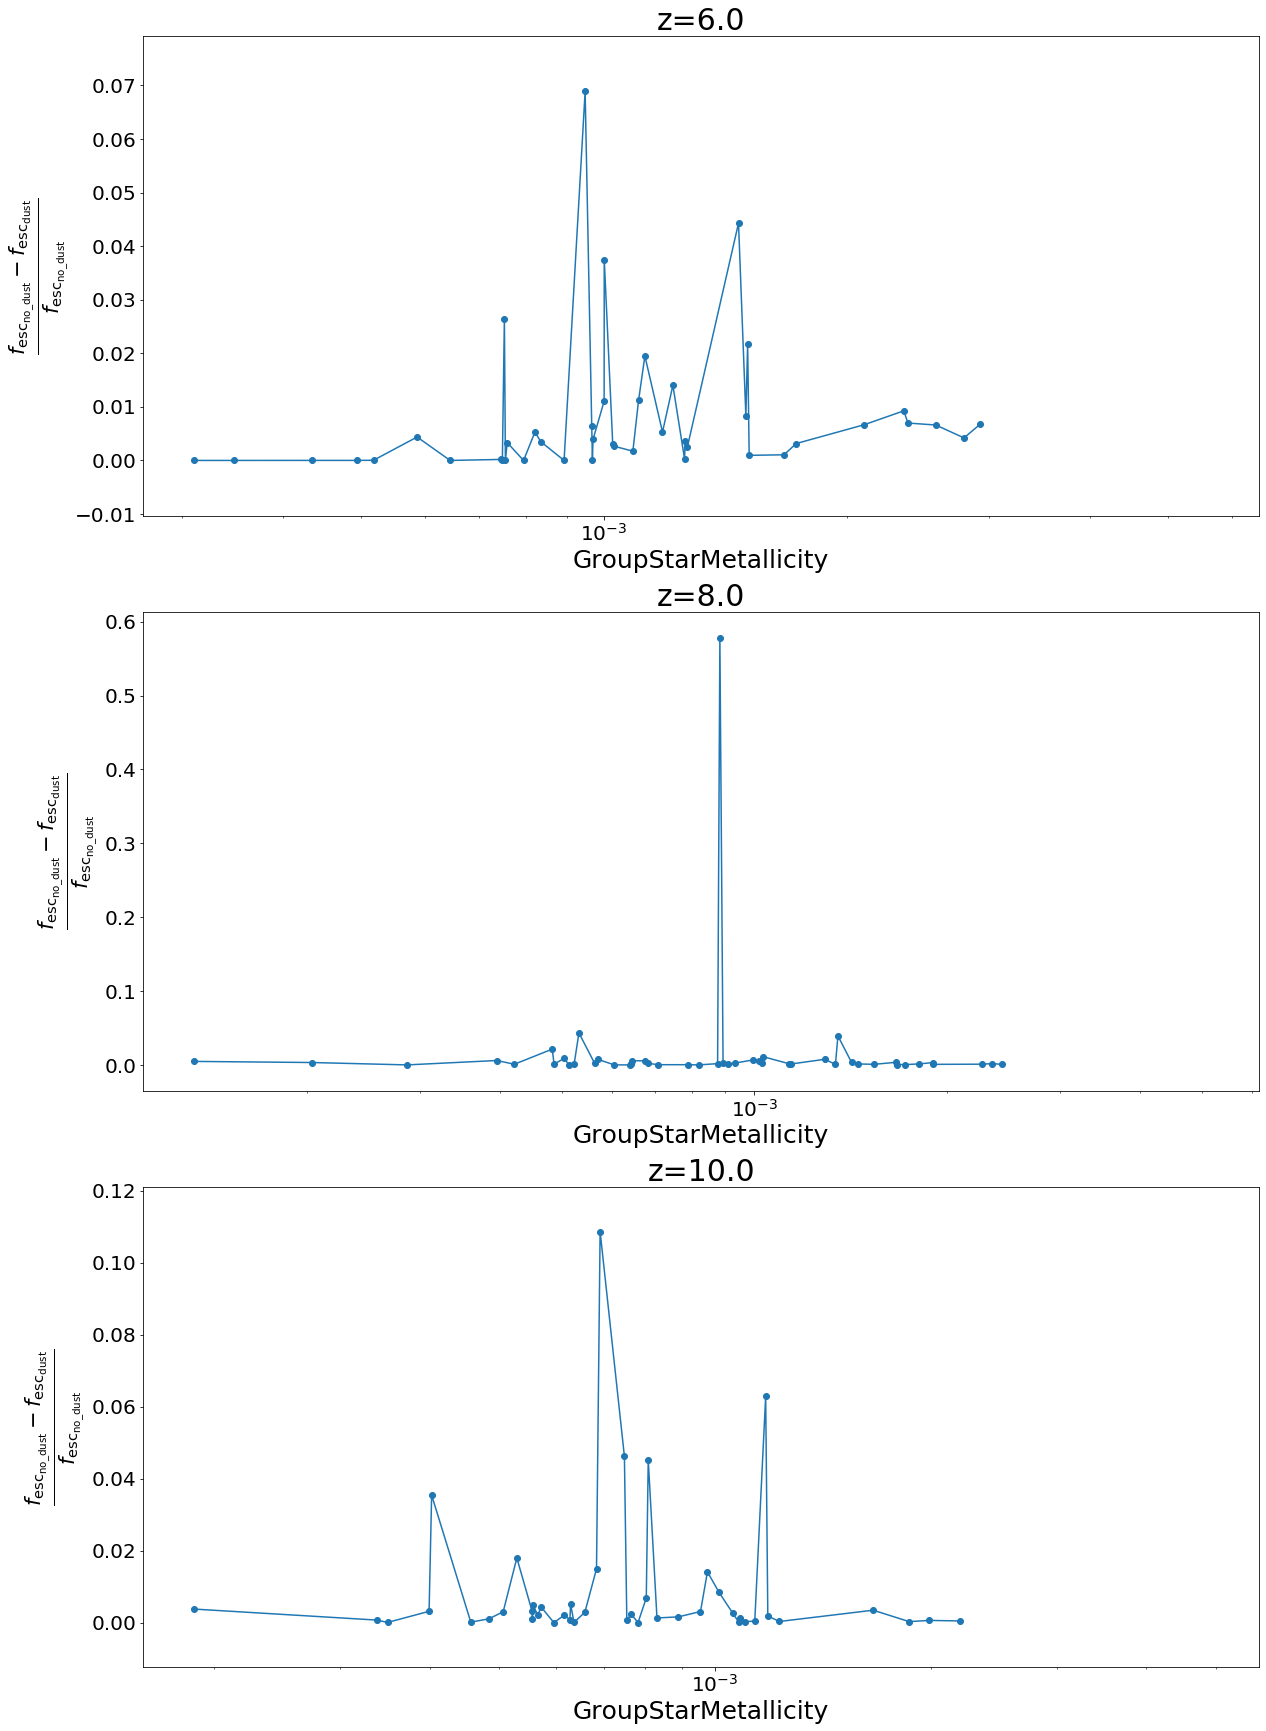

In [56]:
figure, subfigs = plt.subplots(len(halos['dust'].keys()))
for i,snap in enumerate(halos['dust'].keys()):
    dust_ids = set(halos['dust'][snap]['IDs'])
    no_dust_ids = set(halos['dust'][snap]['IDs'])
    IDs = list(dust_ids.intersection(no_dust_ids))
        
    for j,setting in enumerate(halos.keys()):
        metal = []
        f_esc = []
        for ID in IDs:
            element_f_esc = halos[setting][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['cum']
            element_metal = halos[setting][snap]['df'].loc[ID, ('GroupStarMetallicity', 0)]
            f_esc.append(element_f_esc)
            metal.append(element_metal)
            
        if setting == 'dust':
            f_esc_dust = np.array(f_esc)
        elif setting == 'no_dust': 
            f_esc_no_dust = np.array(f_esc)
    subfigs[i].scatter(np.array(metal),(f_esc_no_dust-f_esc_dust)/f_esc_no_dust)
    metal, esc_diff = zip(*sorted(zip(metal, (f_esc_no_dust-f_esc_dust)/f_esc_no_dust)))
    subfigs[i].plot(metal, esc_diff)
    subfigs[i].set_xscale('log')
    subfigs[i].set_xlabel('GroupStarMetallicity', size='25')
    subfigs[i].set_ylabel(r'$\frac{f_{\mathrm{esc}_{\mathrm{no\_dust}}}-f_{\mathrm{esc}_{\mathrm{dust}}}}{f_{\mathrm{esc}_{\mathrm{no\_dust}}}}$', size='30')
    subfigs[i].set_xticks
    title = f'z={z[i]}'
    subfigs[i].set_title(title,fontsize=30)
plt.show();

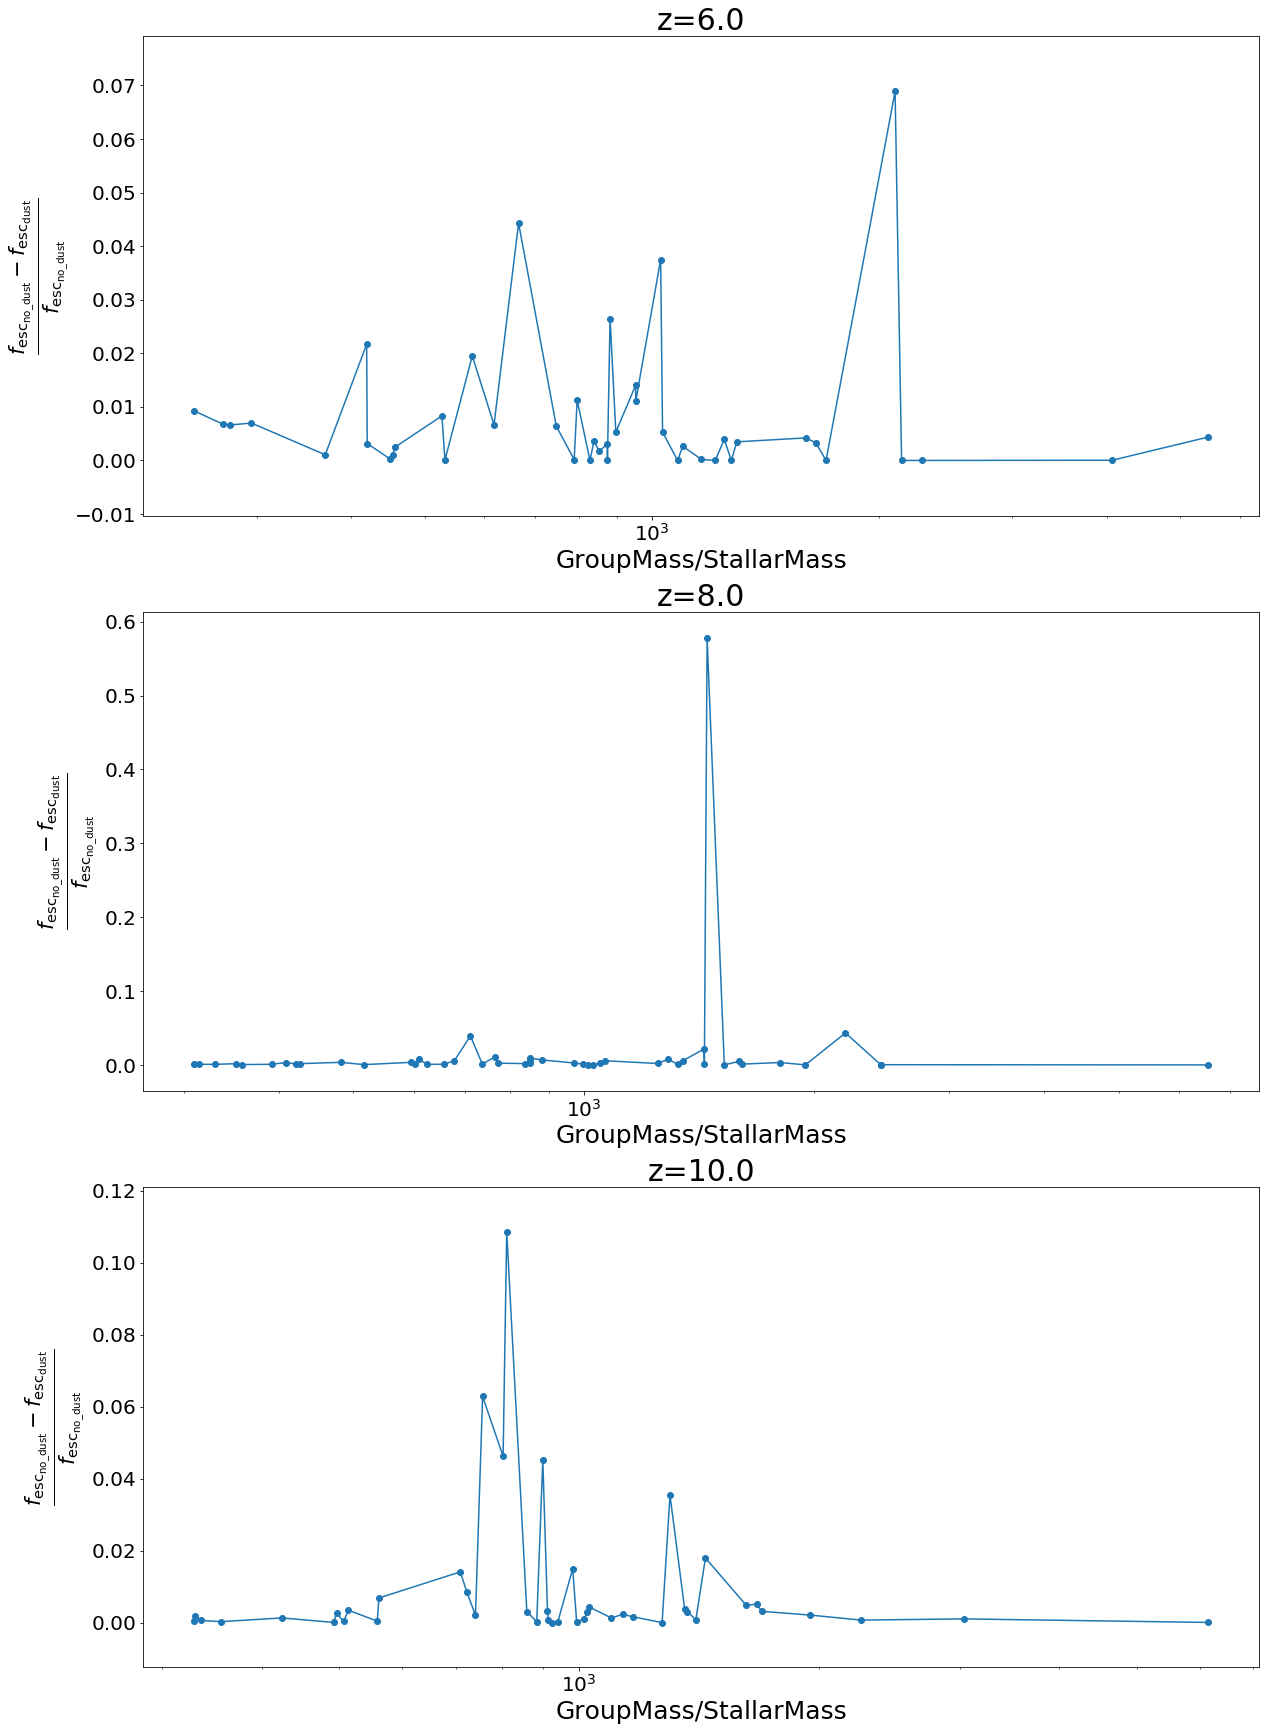

In [57]:
figure, subfigs = plt.subplots(len(halos['dust'].keys()))
for i,snap in enumerate(halos['dust'].keys()):
    dust_ids = set(halos['dust'][snap]['IDs'])
    no_dust_ids = set(halos['dust'][snap]['IDs'])
    IDs = list(dust_ids.intersection(no_dust_ids))
        
    for j,setting in enumerate(halos.keys()):
        rel_mass = []
        f_esc = []
        for ID in IDs:
            element_f_esc = halos[setting][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['cum']
            element_mass = halos[setting][snap]['df'].loc[ID, ('GroupMass',0)]
            element_star_mass = halos[setting][snap]['df'].loc[ID, ('M_star', 0)]
            f_esc.append(element_f_esc)
            rel_mass.append(element_mass/element_star_mass)
            
        if setting == 'dust':
            f_esc_dust = np.array(f_esc)
        elif setting == 'no_dust': 
            f_esc_no_dust = np.array(f_esc)
    subfigs[i].scatter(np.array(rel_mass),(f_esc_no_dust-f_esc_dust)/f_esc_no_dust)
    rel_mass, esc_diff = zip(*sorted(zip(rel_mass, (f_esc_no_dust-f_esc_dust)/f_esc_no_dust)))
    subfigs[i].plot(rel_mass, esc_diff)
    subfigs[i].set_xscale('log')
    subfigs[i].set_xlabel('GroupMass/StallarMass', size='25')
    subfigs[i].set_ylabel(r'$\frac{f_{\mathrm{esc}_{\mathrm{no\_dust}}}-f_{\mathrm{esc}_{\mathrm{dust}}}}{f_{\mathrm{esc}_{\mathrm{no\_dust}}}}$', size='30')
    title = f'z={z[i]}'
    subfigs[i].set_title(title,fontsize=30)
plt.show();

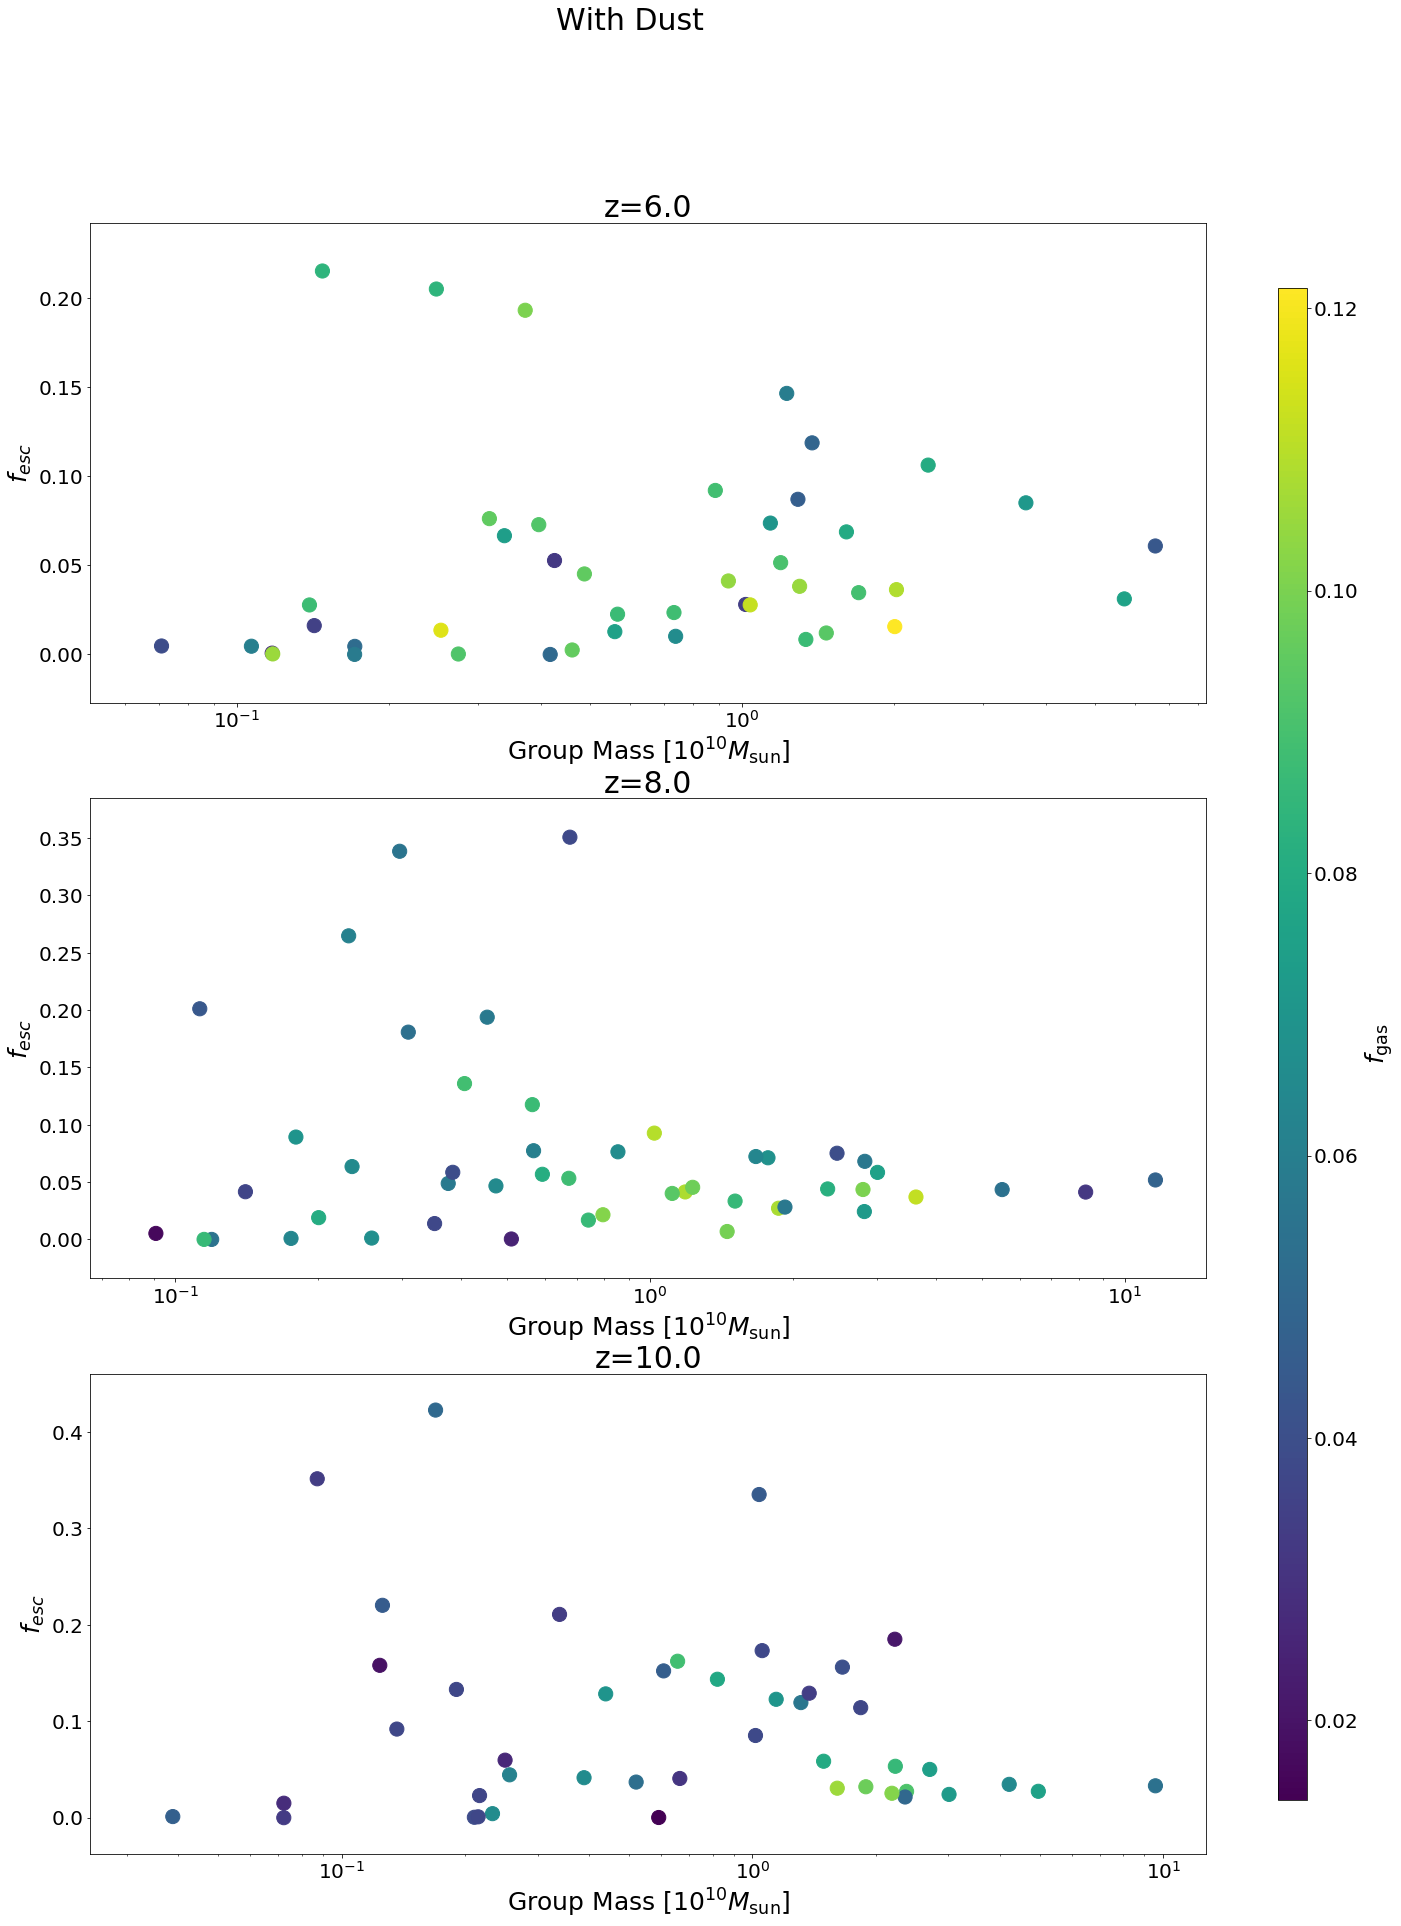

In [58]:
figure, subfigs = plt.subplots(len(halos['dust'].keys()))
for i,snap in enumerate(halos['dust'].keys()):
    mass = []
    f_esc = []
    gas_fraction = []
    for ID in halos['dust'][snap]['IDs']:
        element_f_esc = halos['dust'][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['cum']
        element_mass = halos['dust'][snap]['df'].loc[ID, ('GroupMass',0)]
        element_gas = halos['dust'][snap]['df'].loc[ID, ('gas_mass',0)]
        f_esc.append(element_f_esc)
        mass.append(element_mass)
        gas_fraction.append(element_gas/element_mass)
    
    if i==0:
        all_rel_gas = []
        for snap2 in halos['dust'].keys():
            for ID in halos['dust'][snap2]['IDs']:
                element_mass = halos['dust'][snap2]['df'].loc[ID, ('GroupMass',0)]
                element_gas_mass = halos['dust'][snap2]['df'].loc[ID, ('gas_mass',0)]
                all_rel_gas.append(element_gas_mass/element_mass)

    all_rel_gas = np.array(all_rel_gas)
    min_, max_ = all_rel_gas.min(), all_rel_gas.max()
    norm = plt.Normalize(min_, max_)
    
    subfig = subfigs[i].scatter(mass,f_esc, c=gas_fraction, s=200, norm=norm)
    subfigs[i].set_xscale('log')
    subfigs[i].set_xlabel('Group Mass [$10^{10}M_{\mathrm{sun}}$]', size='25')
    subfigs[i].set_ylabel('$f_{esc}$', size='25')
    #ar = figure.colorbar(subfig, ax=subfigs[i])
    #bar.set_label('$f_{\mathrm{gas}}$', fontsize=25)
    #subfigs[i].legend(fontsize=20)
    title = f'z={z[i]}'
    subfigs[i].set_title(title,fontsize=30)
    
cb_ax = figure.add_axes([0.95, 0.15, 0.02, 0.7])
cbar = figure.colorbar(subfig, cax=cb_ax)
cbar.set_label('$f_{\mathrm{gas}}$', fontsize=25)
figure.suptitle('With Dust', fontsize=30)
plt.show();

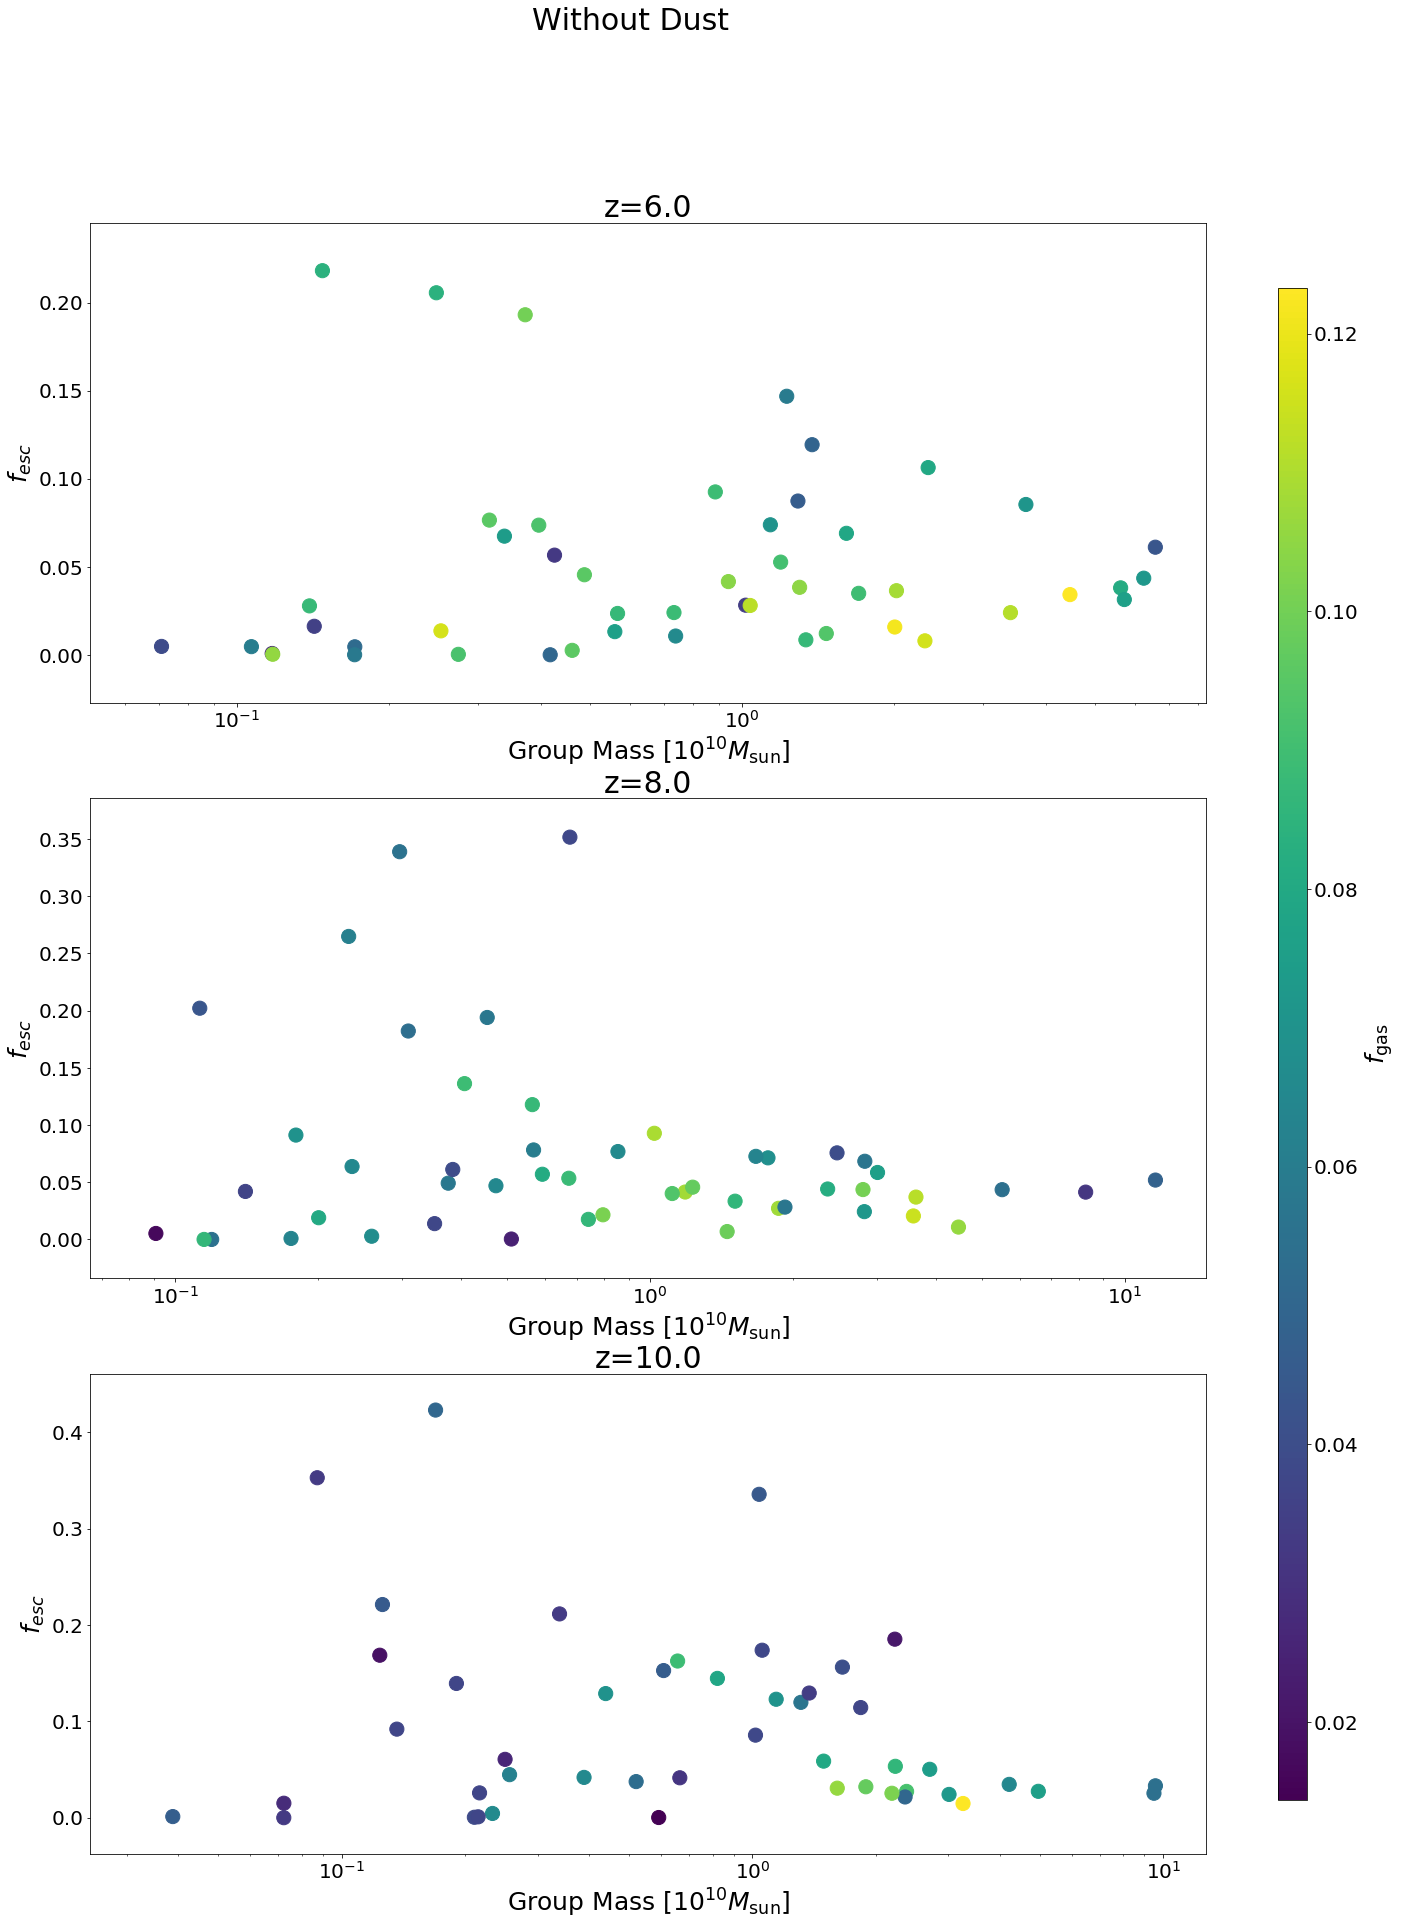

In [59]:
figure, subfigs = plt.subplots(len(halos['dust'].keys()))
for i,snap in enumerate(halos['dust'].keys()):
    mass = []
    f_esc = []
    gas_fraction = []
    for ID in halos['no_dust'][snap]['IDs']:
        element_f_esc = halos['no_dust'][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['cum']
        element_mass = halos['no_dust'][snap]['df'].loc[ID, ('GroupMass',0)]
        element_gas = halos['no_dust'][snap]['df'].loc[ID, ('gas_mass',0)]
        f_esc.append(element_f_esc)
        mass.append(element_mass)
        gas_fraction.append(element_gas/element_mass)
    
    if i==0:
        all_rel_gas = []
        for snap2 in halos['no_dust'].keys():
            for ID in halos['no_dust'][snap2]['IDs']:
                element_mass = halos['no_dust'][snap2]['df'].loc[ID, ('GroupMass',0)]
                element_gas_mass = halos['no_dust'][snap2]['df'].loc[ID, ('gas_mass',0)]
                all_rel_gas.append(element_gas_mass/element_mass)

    all_rel_gas = np.array(all_rel_gas)
    min_, max_ = all_rel_gas.min(), all_rel_gas.max()
    norm = plt.Normalize(min_, max_)
    
    subfig = subfigs[i].scatter(mass,f_esc, c=gas_fraction, s=200, norm=norm)
    subfigs[i].set_xscale('log')
    subfigs[i].set_xlabel('Group Mass [$10^{10}M_{\mathrm{sun}}$]', size='25')
    subfigs[i].set_ylabel('$f_{esc}$', size='25')
    #ar = figure.colorbar(subfig, ax=subfigs[i])
    #bar.set_label('$f_{\mathrm{gas}}$', fontsize=25)
    #subfigs[i].legend(fontsize=20)
    title = f'z={z[i]}'
    subfigs[i].set_title(title,fontsize=30)
    
cb_ax = figure.add_axes([0.95, 0.15, 0.02, 0.7])
cbar = figure.colorbar(subfig, cax=cb_ax)
cbar.set_label('$f_{\mathrm{gas}}$', fontsize=25)
figure.suptitle('Without Dust', fontsize=30)
plt.show();

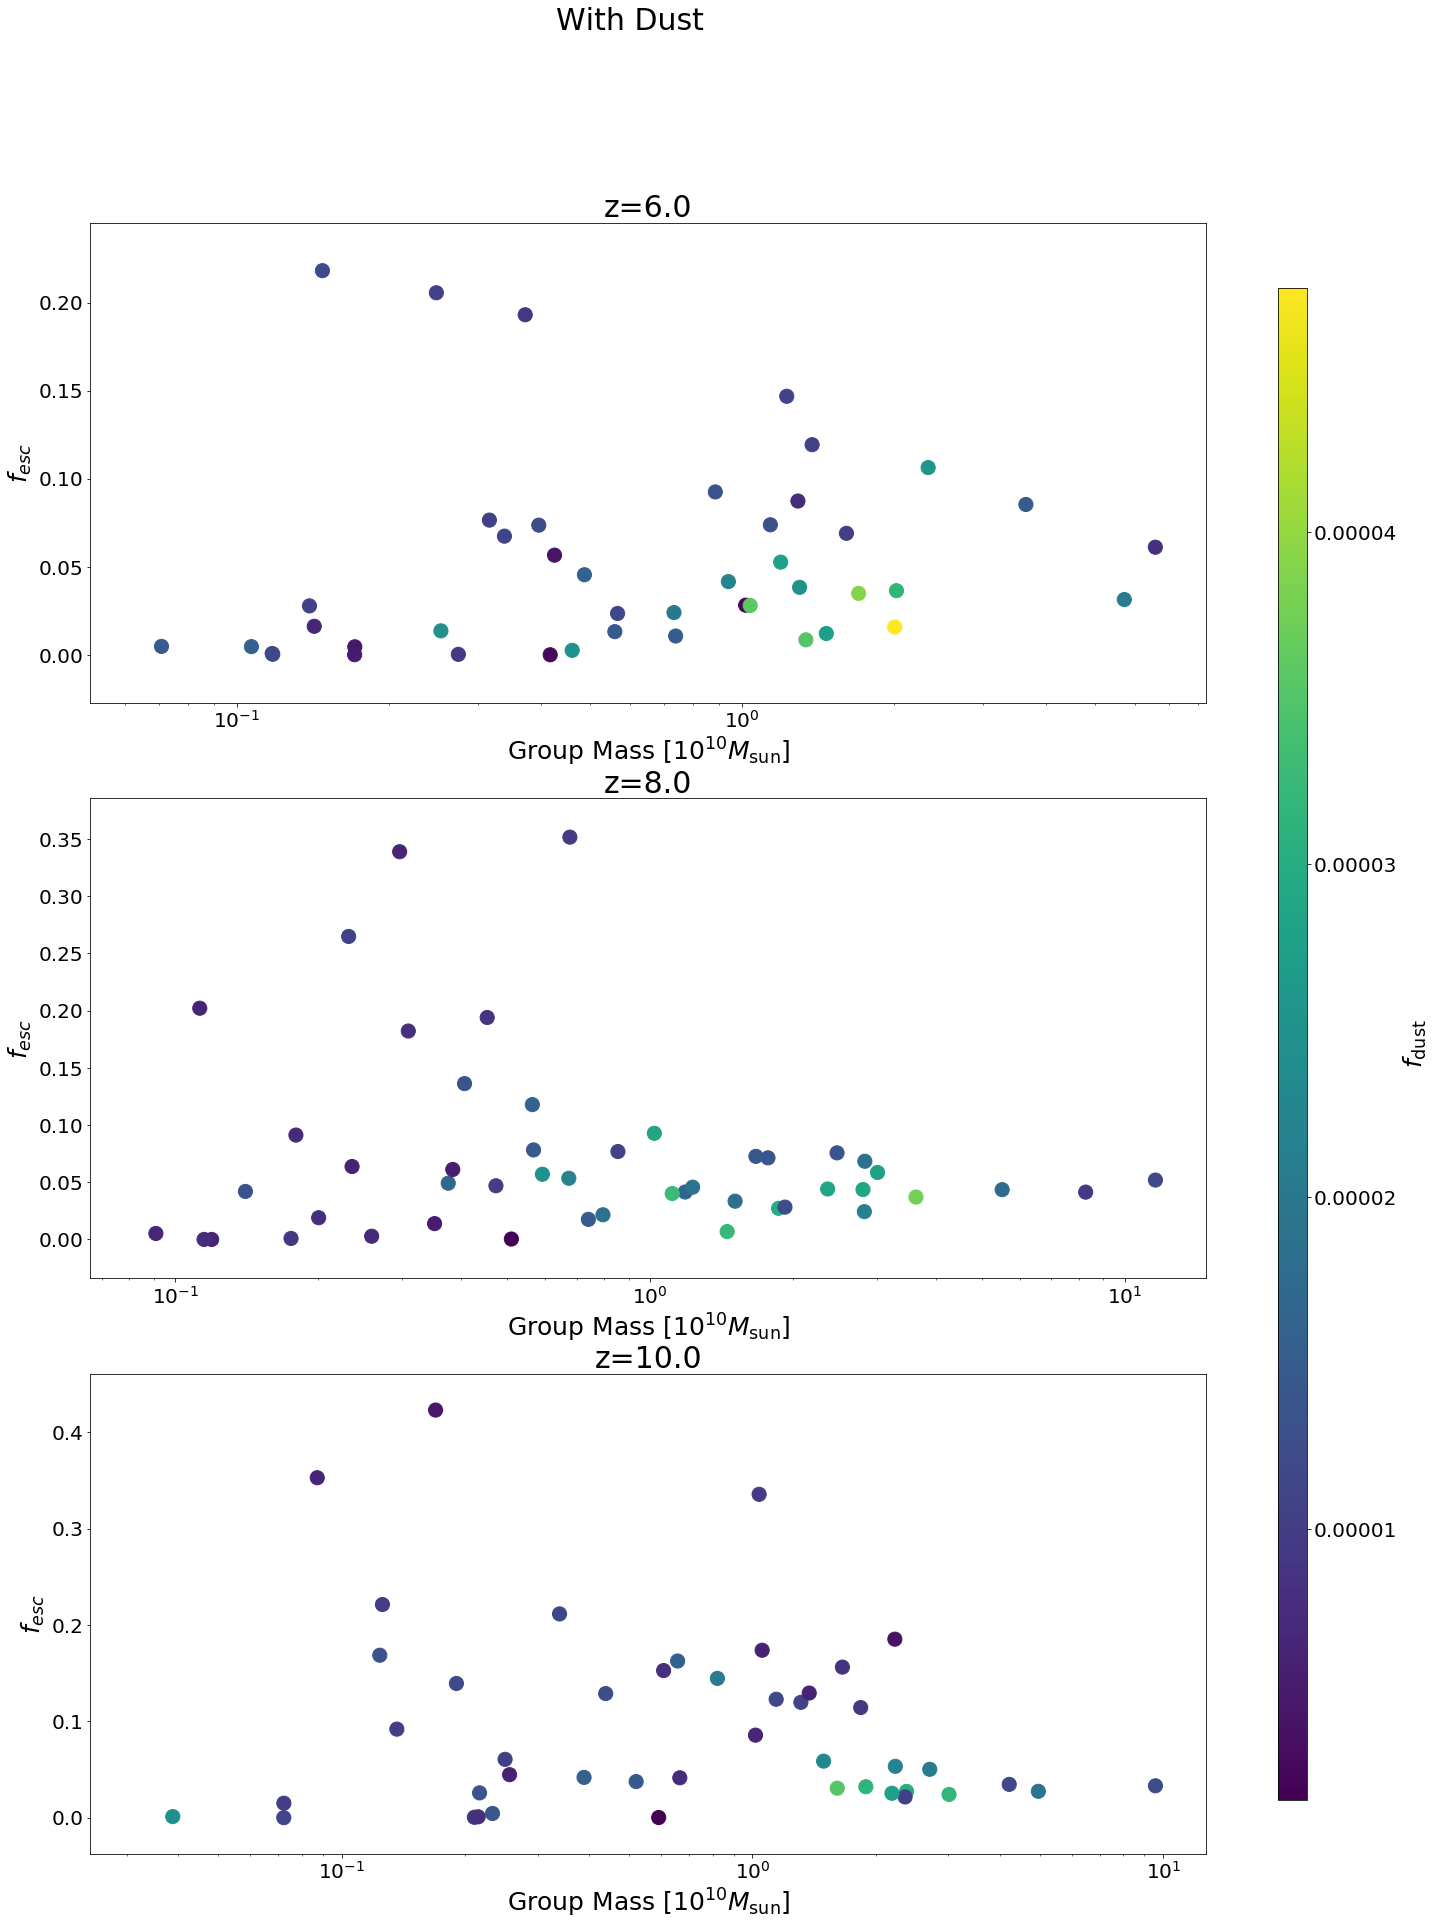

In [60]:
figure, subfigs = plt.subplots(len(halos['dust'].keys()))
for i,snap in enumerate(halos['dust'].keys()):
    mass = []
    f_esc = []
    rel_dust_mass = []
    for ID in halos['dust'][snap]['IDs']:
        element_f_esc = halos[setting][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['cum']
        element_mass = halos[setting][snap]['df'].loc[ID, ('GroupMass',0)]
        element_dust_mass = halos[setting][snap]['df'].loc[ID, ('dust_mass',0)]
        f_esc.append(element_f_esc)
        mass.append(element_mass)
        rel_dust_mass.append(element_dust_mass/element_mass)
    
    if i==0:
        all_rel_dust = []
        for snap2 in halos['dust'].keys():
            for ID in halos['dust'][snap2]['IDs']:
                element_mass = halos['dust'][snap2]['df'].loc[ID, ('GroupMass',0)]
                element_dust_mass = halos['dust'][snap2]['df'].loc[ID, ('dust_mass',0)]
                all_rel_dust.append(element_dust_mass/element_mass)

    all_rel_dust = np.array(all_rel_dust)
    min_, max_ = all_rel_dust.min(), all_rel_dust.max()
    norm = plt.Normalize(min_, max_)
    subfig = subfigs[i].scatter(mass,f_esc, c=rel_dust_mass, s=200, norm=norm)
    subfigs[i].set_xscale('log')
    subfigs[i].set_xlabel('Group Mass [$10^{10}M_{\mathrm{sun}}$]', size='25')
    subfigs[i].set_ylabel('$f_{esc}$', size='25')
    #bar = figure.colorbar(subfig, ax=subfigs[i])
    #bar.set_label('$m_{\mathrm{dust}}/$GroupMass', fontsize=25)
    #subfigs[i].legend(fontsize=20)
    title = f'z={z[i]}'
    subfigs[i].set_title(title,fontsize=30)
    
cb_ax = figure.add_axes([0.95, 0.15, 0.02, 0.7])
cbar = figure.colorbar(subfig, cax=cb_ax)
cbar.set_label('$f_{\mathrm{dust}}$', fontsize=25)
figure.suptitle('With Dust', fontsize=30)
plt.show();

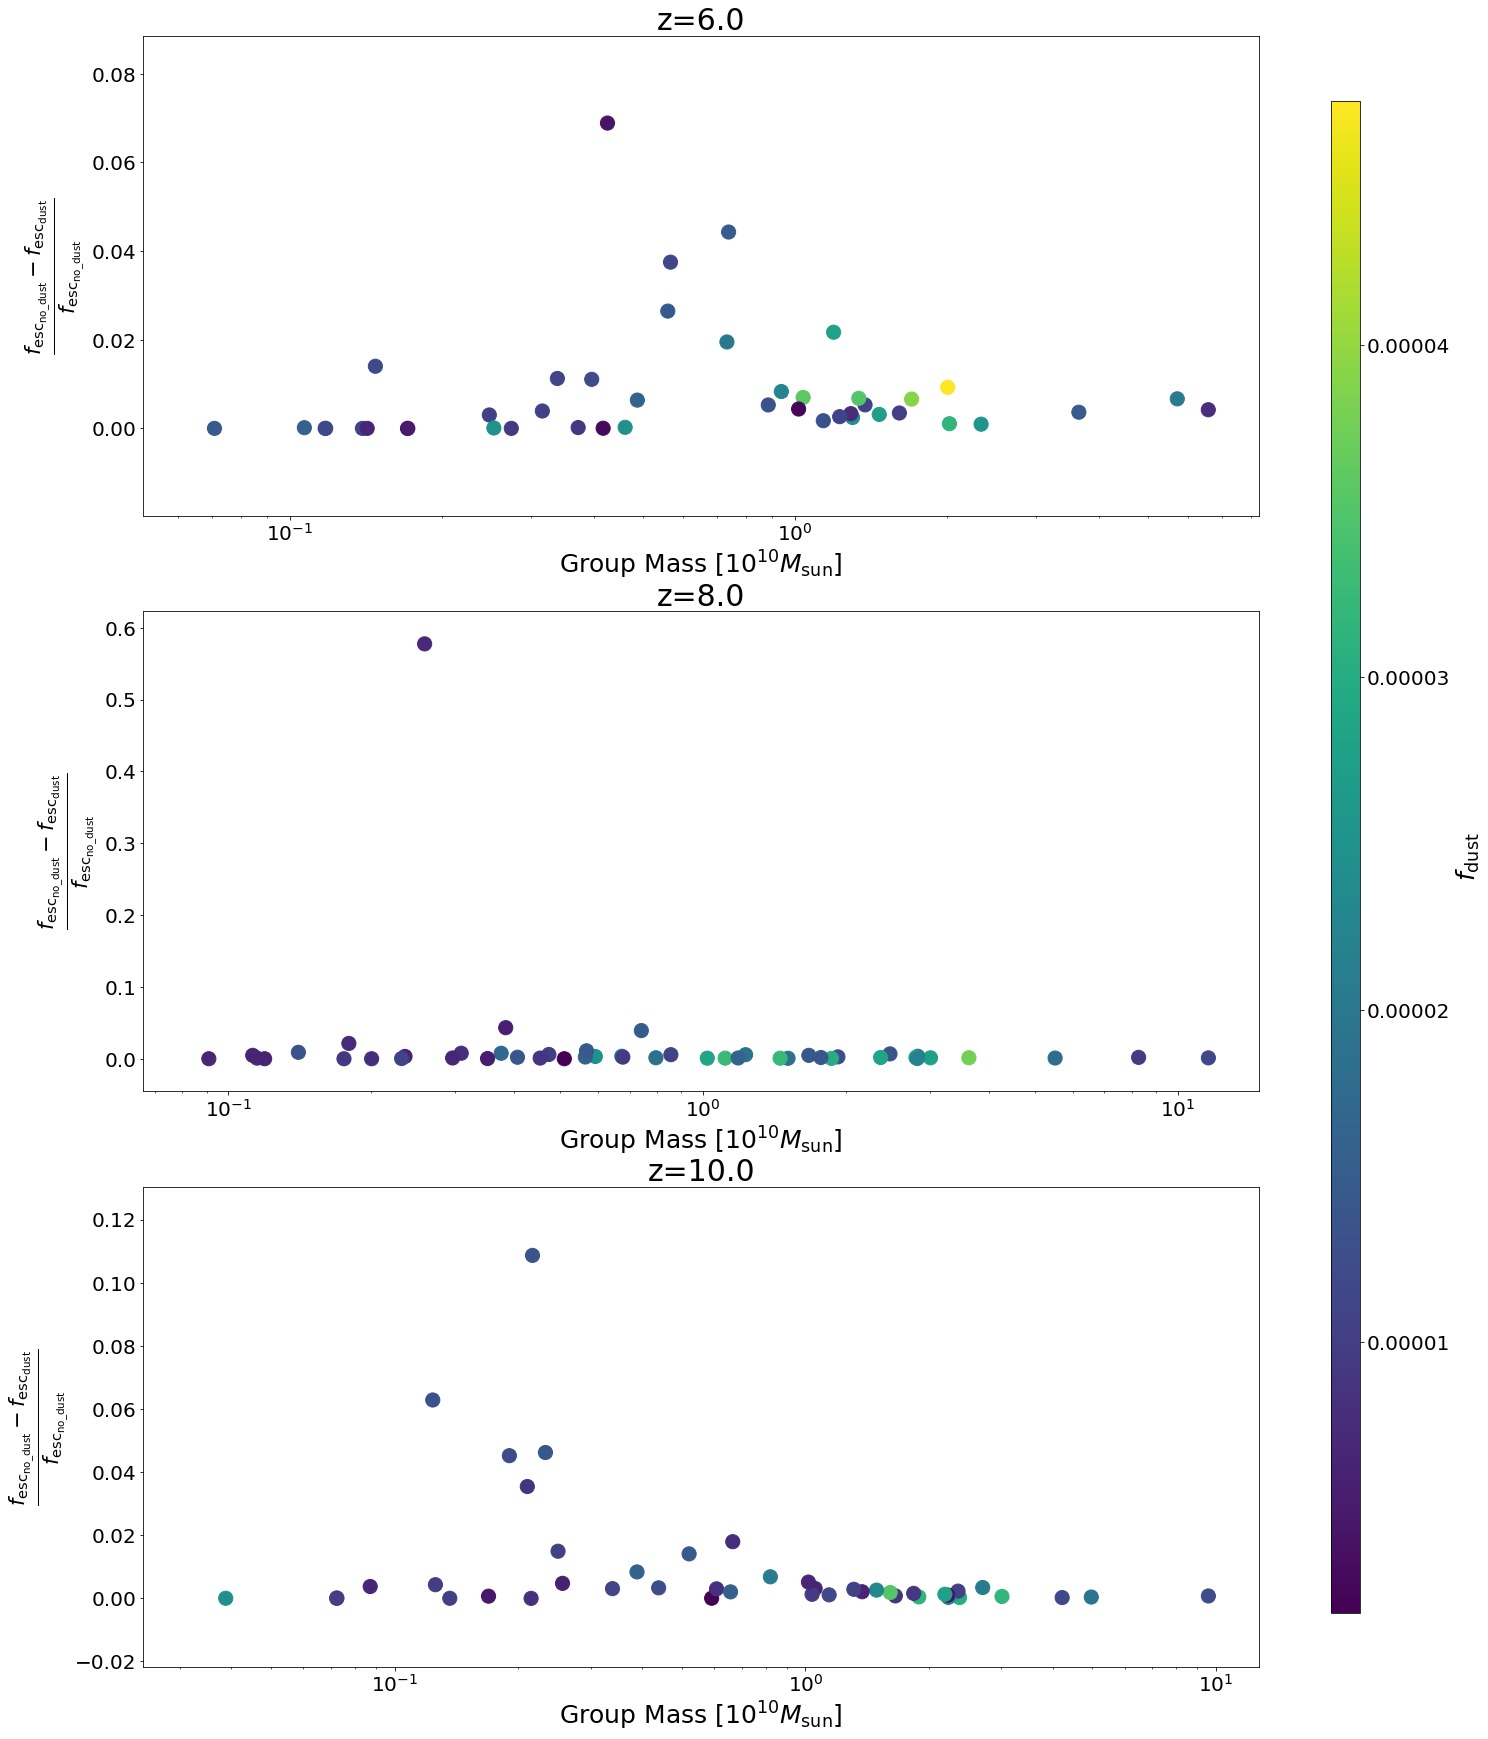

In [61]:
figure, subfigs = plt.subplots(len(halos['dust'].keys()))
for i,snap in enumerate(halos['dust'].keys()):
    dust_ids = set(halos['dust'][snap]['IDs'])
    no_dust_ids = set(halos['no_dust'][snap]['IDs'])
    IDs = list(dust_ids.intersection(no_dust_ids))
    for j,setting in enumerate(halos.keys()):
        mass = []
        f_esc = []
        rel_dust_mass = []
        for ID in IDs:
            element_f_esc = halos[setting][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['cum']
            element_mass = halos[setting][snap]['df'].loc[ID, ('GroupMass',0)]
            element_dust_mass = halos[setting][snap]['df'].loc[ID, ('dust_mass',0)]
            f_esc.append(element_f_esc)
            mass.append(element_mass)
            rel_dust_mass.append(element_dust_mass/element_mass)
            
        if setting == 'dust':
            f_esc_dust = np.array(f_esc)
        elif setting == 'no_dust': 
            f_esc_no_dust = np.array(f_esc)
            
    if i == 0:
        all_rel_dust = []
        for snap2 in halos['dust'].keys():
            dust_ids = set(halos['dust'][snap2]['IDs'])
            no_dust_ids = set(halos['no_dust'][snap2]['IDs'])
            IDs2 = list(dust_ids.intersection(no_dust_ids))
            for setting2 in halos.keys():
                for ID2 in IDs2:
                    element_mass = halos[setting2][snap2]['df'].loc[ID2, ('GroupMass',0)]
                    element_dust_mass = halos[setting2][snap2]['df'].loc[ID2, ('dust_mass',0)]

                    all_rel_dust.append(element_dust_mass/element_mass)

    all_rel_dust = np.array(all_rel_dust)
    min_, max_ = all_rel_dust.min(), all_rel_dust.max()
    norm = plt.Normalize(min_, max_)
    subfig = subfigs[i].scatter(np.array(mass),(f_esc_no_dust-f_esc_dust)/f_esc_no_dust, c=rel_dust_mass, s=200, norm=norm)

    subfigs[i].set_xscale('log')
    subfigs[i].set_xlabel('Group Mass [$10^{10}M_{\mathrm{sun}}$]', size='25')
    subfigs[i].set_ylabel(r'$\frac{f_{\mathrm{esc}_{\mathrm{no\_dust}}}-f_{\mathrm{esc}_{\mathrm{dust}}}}{f_{\mathrm{esc}_{\mathrm{no\_dust}}}}$', size='30')
    title = f'z={z[i]}'
    subfigs[i].set_title(title,fontsize=30)
    #bar = figure.colorbar(subfig, ax=subfigs[i])
    #bar.set_label('$m_{\mathrm{dust}}/$GroupMass', fontsize=25)

cb_ax = figure.add_axes([0.95, 0.15, 0.02, 0.7])
cbar = figure.colorbar(subfig, cax=cb_ax)
cbar.set_label('$f_{\mathrm{dust}}$', fontsize=25)
plt.show();

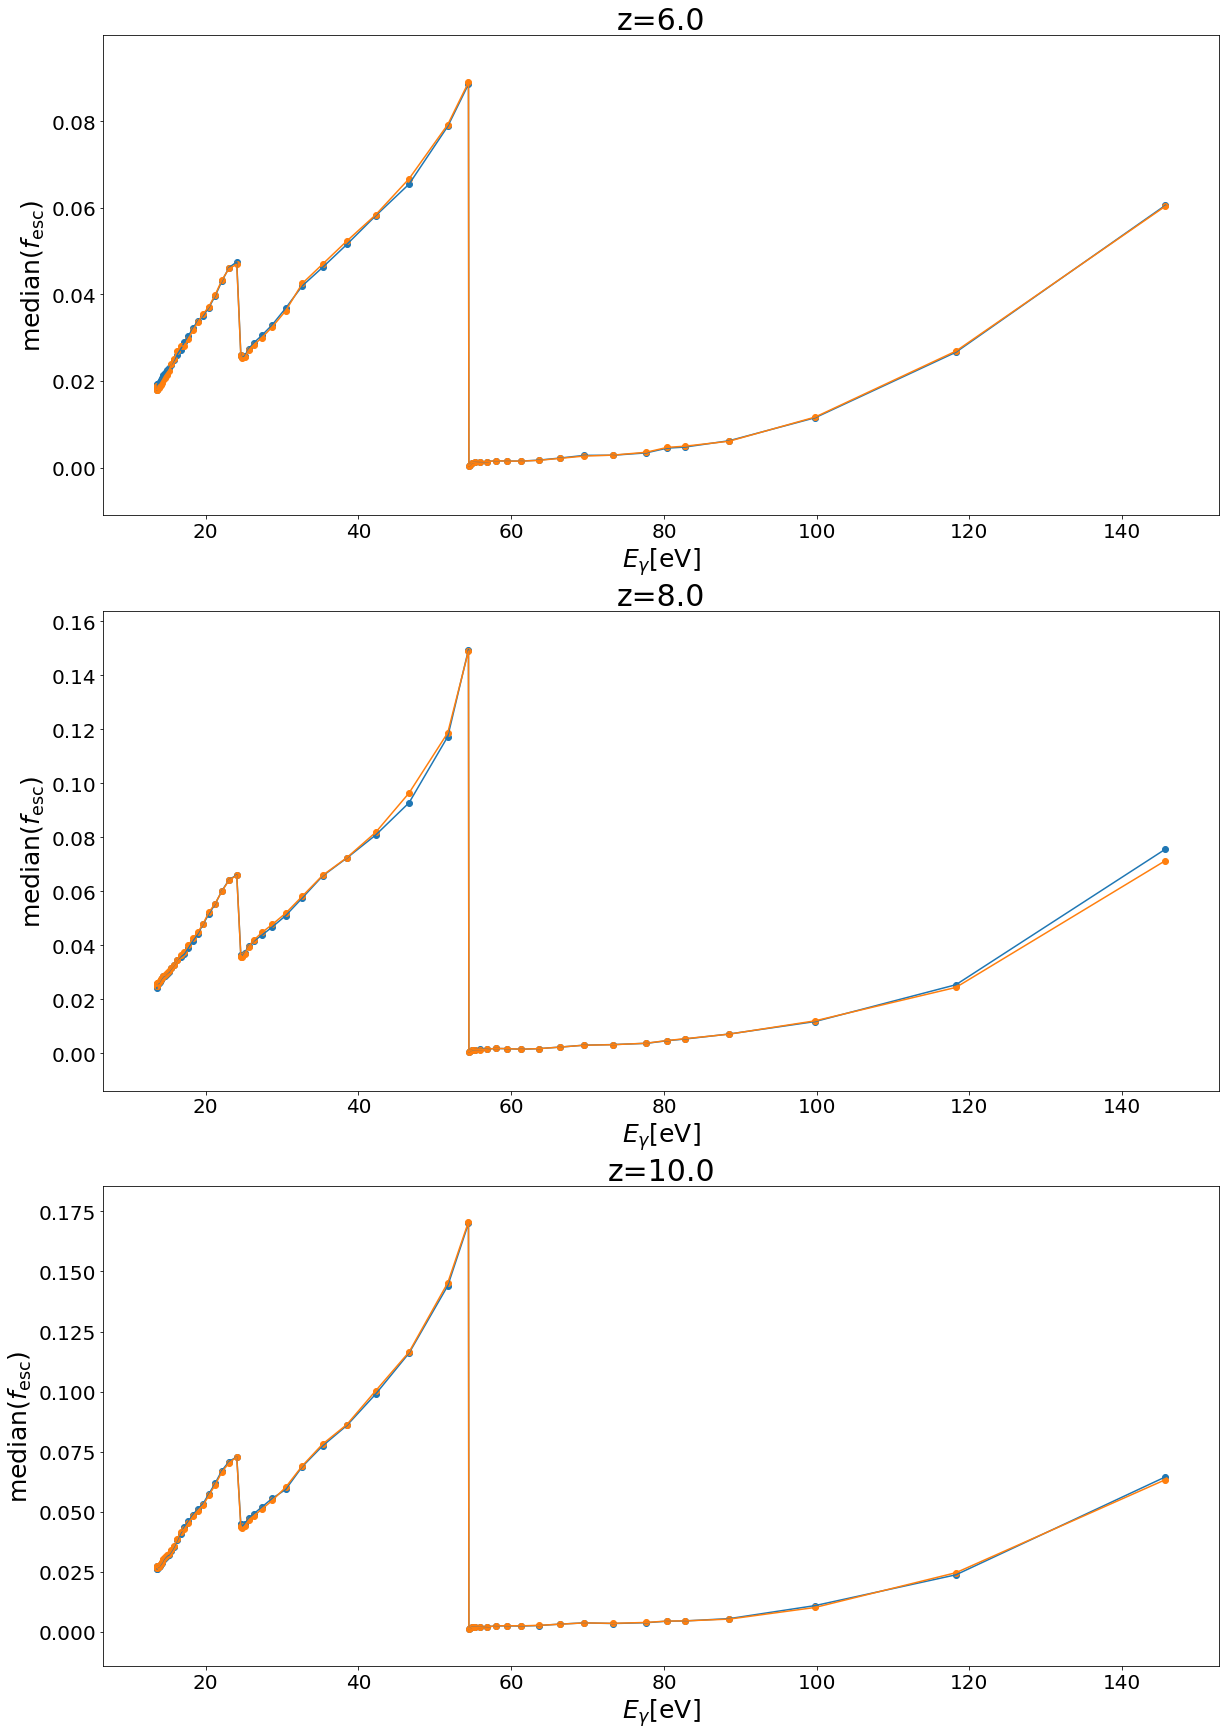

In [18]:
figure, subfigs = plt.subplots(len(halos['dust'].keys()))
freqs = halos[setting][snap]['df'].loc[223, ('f_esc',0)]['5.0e-2']['1.0e0']['freqs']*h/e
for i,snap in enumerate(halos['dust'].keys()):
    dust_ids = set(halos['dust'][snap]['IDs'])
    no_dust_ids = set(halos['no_dust'][snap]['IDs'])
    IDs = list(dust_ids.intersection(no_dust_ids))
    for j,setting in enumerate(halos.keys()):
        mass = []
        f_esc = []
        rel_dust_mass = []
        for ID in IDs:
            element_f_esc = halos[setting][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['per_freq']
            f_esc.append(element_f_esc)
        freq_f_esc=np.array(f_esc)
        freq_f_esc=np.median(freq_f_esc, axis=0)
        
        if setting == 'dust':
            freq_f_esc_dust = np.array(freq_f_esc)
        elif setting == 'no_dust': 
            freq_f_esc_no_dust = np.array(freq_f_esc)
        freq_f_esc.shape
        
    subfigs[i].scatter(freqs, freq_f_esc_dust)
    subfigs[i].plot(freqs, freq_f_esc_dust)
    subfigs[i].scatter(freqs, freq_f_esc_no_dust)
    subfigs[i].plot(freqs, freq_f_esc_no_dust)
    #subfigs[i].set_xscale('log')
    subfigs[i].set_xlabel('$E_{\gamma}[\mathrm{eV}]$', size='25')
    subfigs[i].set_ylabel('median($f_{\mathrm{esc}}$)', size='25')
    title = f'z={z[i]}'
    subfigs[i].set_title(title,fontsize=30)
plt.show();

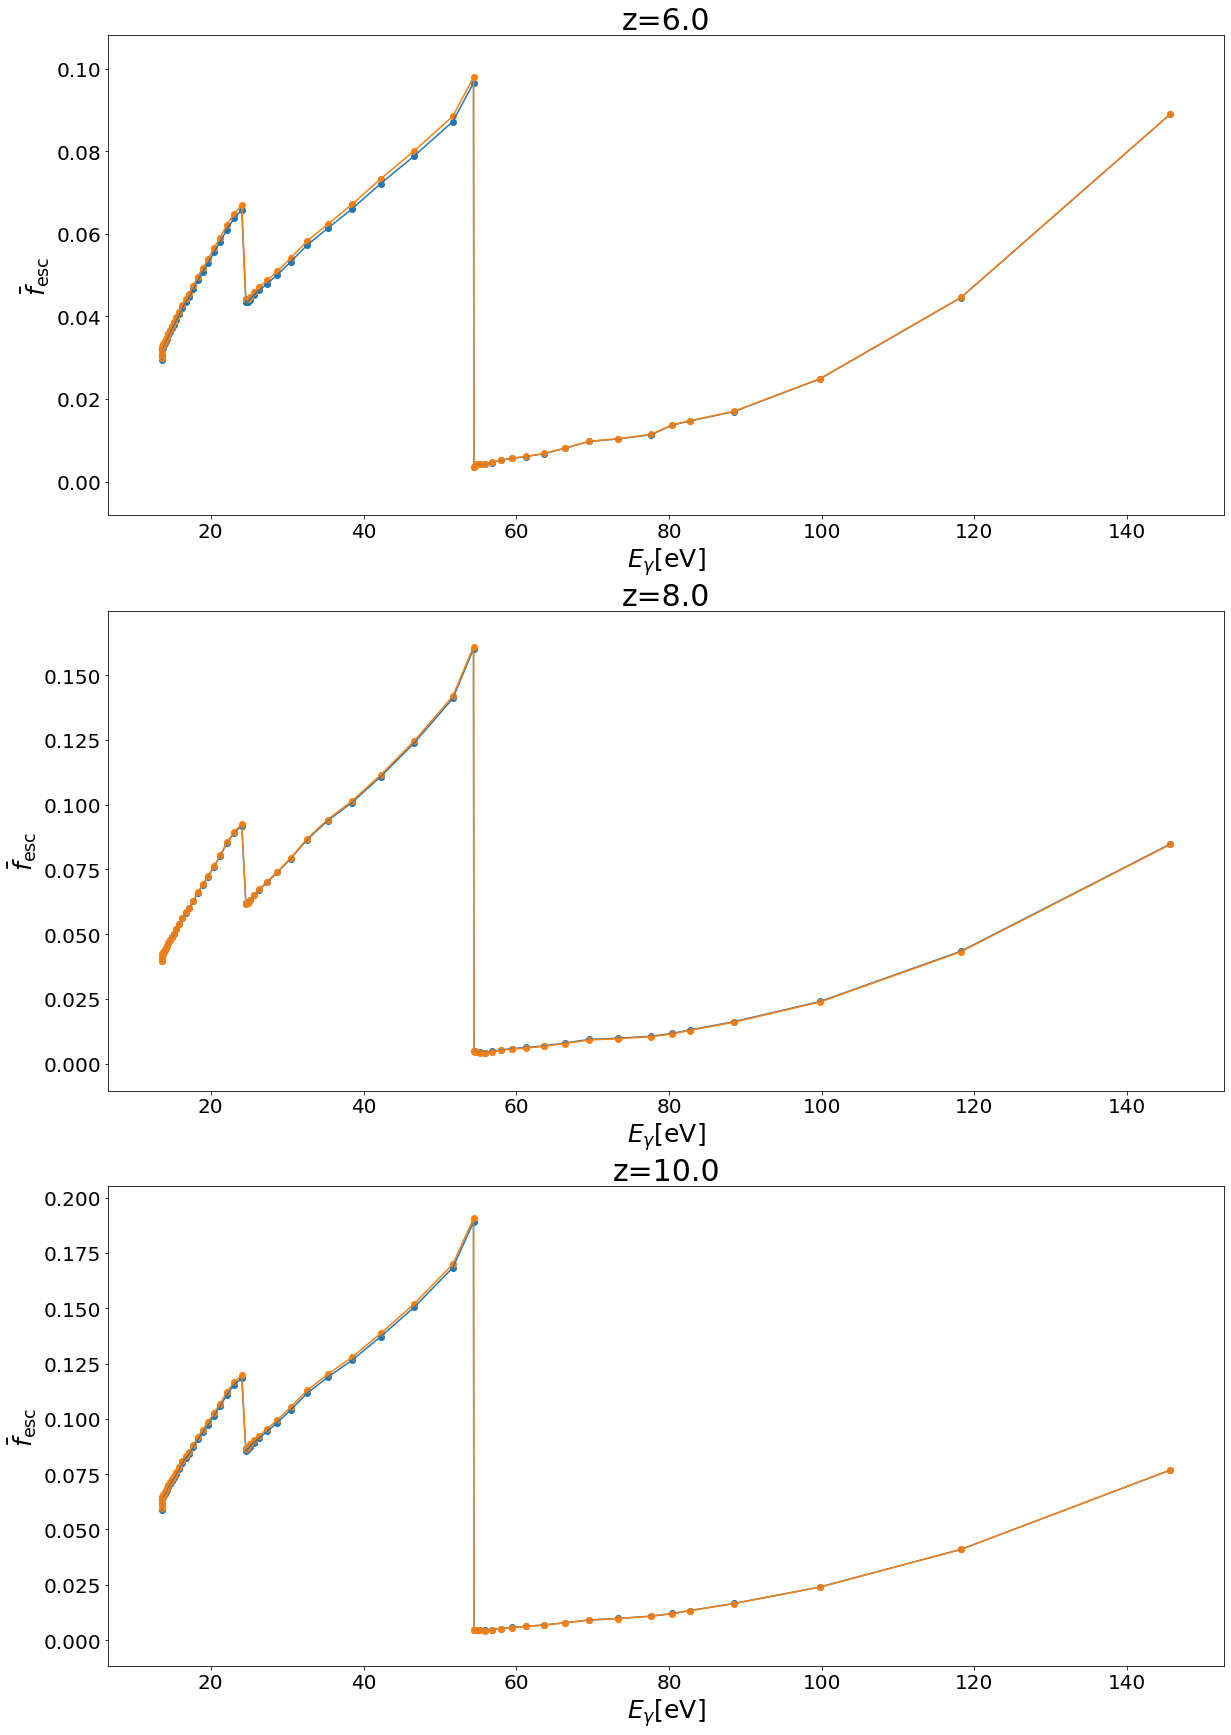

In [19]:
figure, subfigs = plt.subplots(len(halos['dust'].keys()))
freqs = halos[setting][snap]['df'].loc[223, ('f_esc',0)]['5.0e-2']['1.0e0']['freqs']*h/e
for i,snap in enumerate(halos['dust'].keys()):
    dust_ids = set(halos['dust'][snap]['IDs'])
    no_dust_ids = set(halos['no_dust'][snap]['IDs'])
    IDs = list(dust_ids.intersection(no_dust_ids))
    for j,setting in enumerate(halos.keys()):
        mass = []
        f_esc = []
        rel_dust_mass = []
        for ID in IDs:
            element_f_esc = halos[setting][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['per_freq']
            f_esc.append(element_f_esc)
        freq_f_esc=np.array(f_esc)
        freq_f_esc=np.average(freq_f_esc, axis=0)
        
        if setting == 'dust':
            freq_f_esc_dust = np.array(freq_f_esc)
        elif setting == 'no_dust': 
            freq_f_esc_no_dust = np.array(freq_f_esc)
        
    subfigs[i].scatter(freqs, freq_f_esc_dust)
    subfigs[i].plot(freqs, freq_f_esc_dust)
    subfigs[i].scatter(freqs, freq_f_esc_no_dust)
    subfigs[i].plot(freqs, freq_f_esc_no_dust)
    #subfigs[i].set_xscale('log')
    subfigs[i].set_xlabel('$E_{\gamma}[\mathrm{eV}]$', size='25')
    subfigs[i].set_ylabel(r'$\bar{f}_{\mathrm{esc}}$', size='25')
    title = f'z={z[i]}'
    subfigs[i].set_title(title,fontsize=30)
plt.show();

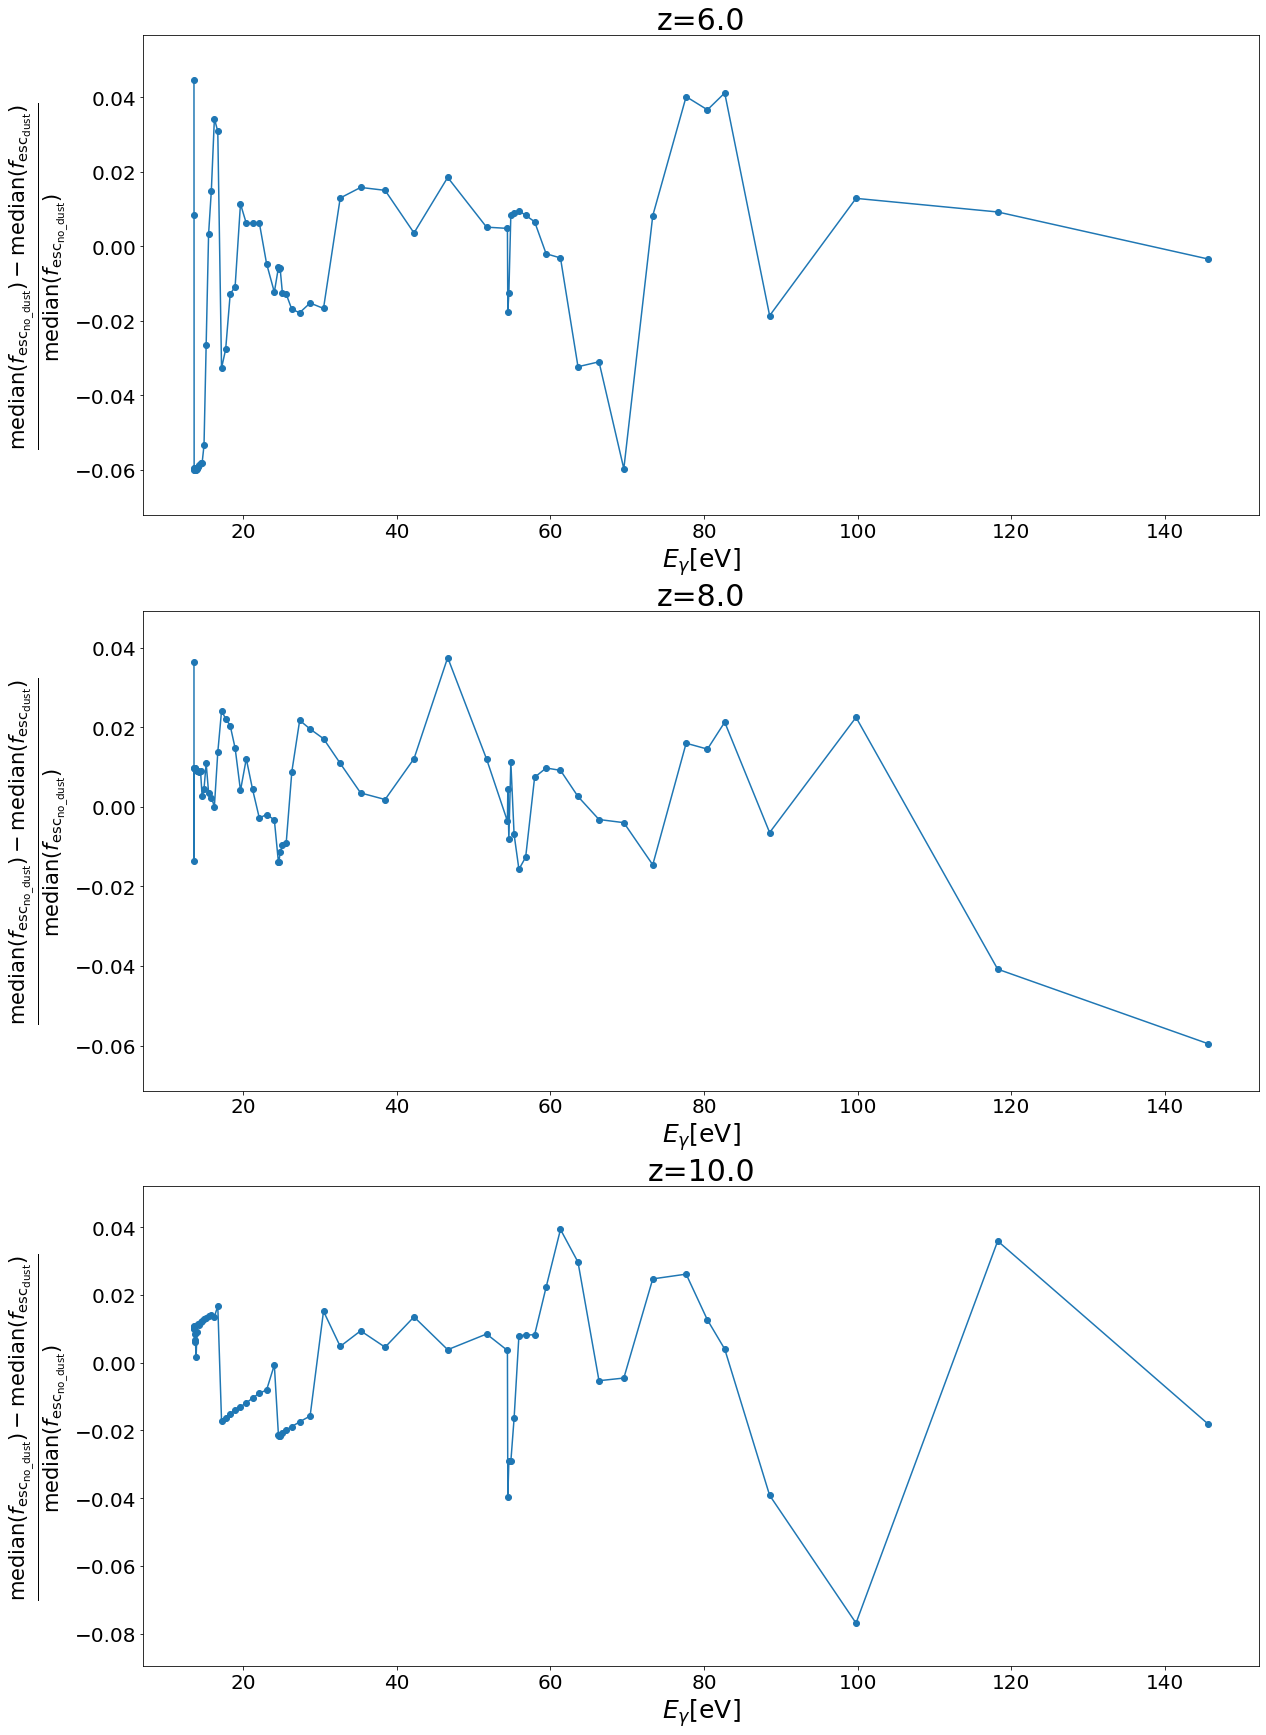

In [20]:
figure, subfigs = plt.subplots(len(halos['dust'].keys()))
freqs = halos[setting][snap]['df'].loc[223, ('f_esc',0)]['5.0e-2']['1.0e0']['freqs']*h/e
for i,snap in enumerate(halos['dust'].keys()):
    dust_ids = set(halos['dust'][snap]['IDs'])
    no_dust_ids = set(halos['no_dust'][snap]['IDs'])
    IDs = list(dust_ids.intersection(no_dust_ids))
    for j,setting in enumerate(halos.keys()):
        mass = []
        f_esc = []
        rel_dust_mass = []
        for ID in IDs:
            element_f_esc = halos[setting][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['per_freq']
            f_esc.append(element_f_esc)
        freq_f_esc=np.array(f_esc)
        freq_f_esc=np.median(freq_f_esc, axis=0)
        
        if setting == 'dust':
            freq_f_esc_dust = np.array(freq_f_esc)
        elif setting == 'no_dust': 
            freq_f_esc_no_dust = np.array(freq_f_esc)
        
    subfigs[i].scatter(freqs, (freq_f_esc_no_dust-freq_f_esc_dust)/freq_f_esc_no_dust)
    subfigs[i].plot(freqs, (freq_f_esc_no_dust-freq_f_esc_dust)/freq_f_esc_no_dust)
    #subfigs[i].set_xscale('log')
    subfigs[i].set_xlabel('$E_{\gamma}[\mathrm{eV}]$', size='25')
    subfigs[i].set_ylabel(r'$\frac{\mathrm{median}(f_{\mathrm{esc}_{\mathrm{no\_dust}}})-\mathrm{median}(f_{\mathrm{esc}_{\mathrm{dust}}})}{\mathrm{median}(f_{\mathrm{esc}_{\mathrm{no\_dust}}})}$', size='30')
    title = f'z={z[i]}'
    subfigs[i].set_title(title,fontsize=30)
plt.show();

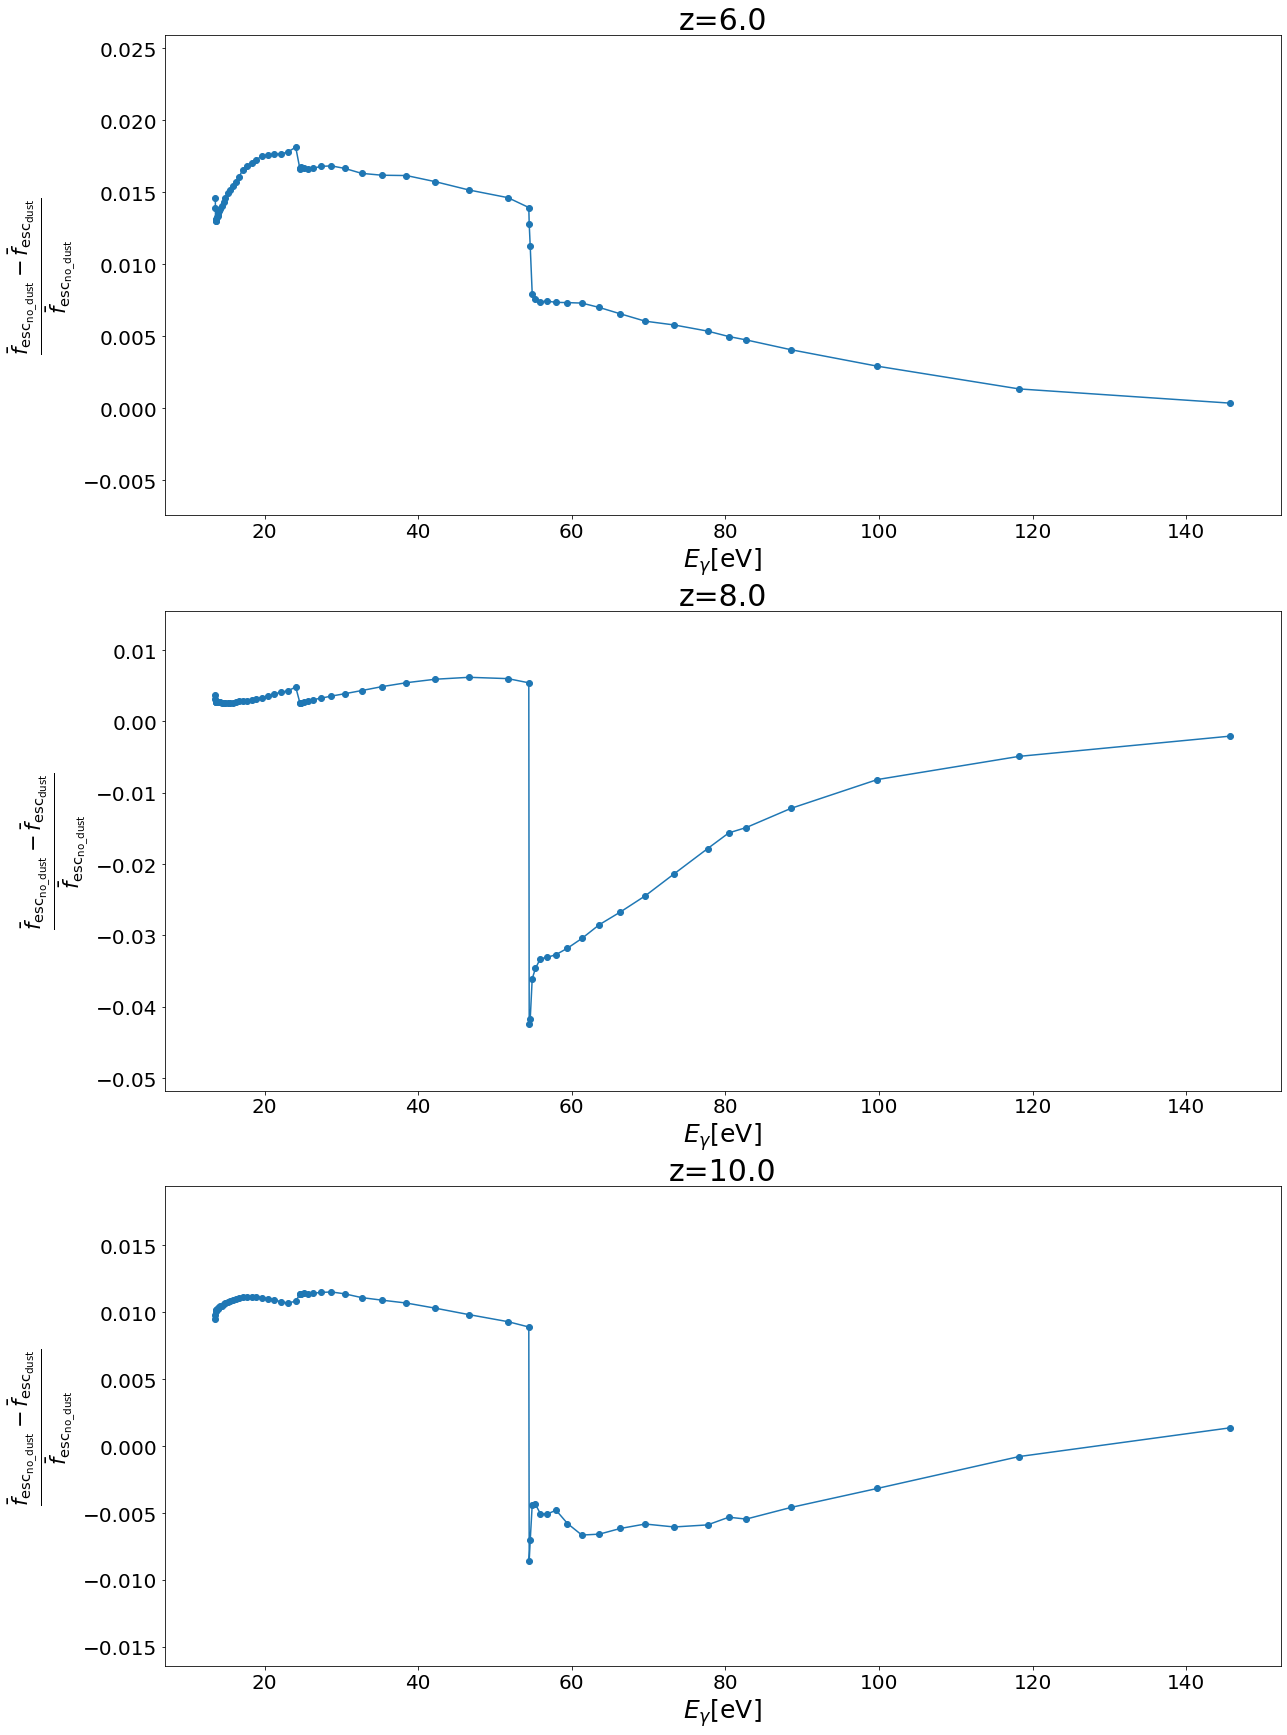

In [21]:
figure, subfigs = plt.subplots(len(halos['dust'].keys()))
freqs = halos[setting][snap]['df'].loc[223, ('f_esc',0)]['5.0e-2']['1.0e0']['freqs']*h/e
for i,snap in enumerate(halos['dust'].keys()):
    dust_ids = set(halos['dust'][snap]['IDs'])
    no_dust_ids = set(halos['no_dust'][snap]['IDs'])
    IDs = list(dust_ids.intersection(no_dust_ids))
    for j,setting in enumerate(halos.keys()):
        mass = []
        f_esc = []
        rel_dust_mass = []
        for ID in IDs:
            element_f_esc = halos[setting][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['per_freq']
            f_esc.append(element_f_esc)
        freq_f_esc=np.array(f_esc)
        freq_f_esc=np.average(freq_f_esc, axis=0)
        
        if setting == 'dust':
            freq_f_esc_dust = np.array(freq_f_esc)
        elif setting == 'no_dust': 
            freq_f_esc_no_dust = np.array(freq_f_esc)
        
    subfigs[i].scatter(freqs, (freq_f_esc_no_dust-freq_f_esc_dust)/freq_f_esc_no_dust)
    subfigs[i].plot(freqs, (freq_f_esc_no_dust-freq_f_esc_dust)/freq_f_esc_no_dust)
    #subfigs[i].set_xscale('log')
    subfigs[i].set_xlabel('$E_{\gamma}[\mathrm{eV}]$', size='25')
    subfigs[i].set_ylabel(r'$\frac{\bar{f}_{\mathrm{esc}_{\mathrm{no\_dust}}}-\bar{f}_{\mathrm{esc}_{\mathrm{dust}}}}{\bar{f}_{\mathrm{esc}_{\mathrm{no\_dust}}}}$', size='30')
    title = f'z={z[i]}'
    subfigs[i].set_title(title,fontsize=30)

plt.show();

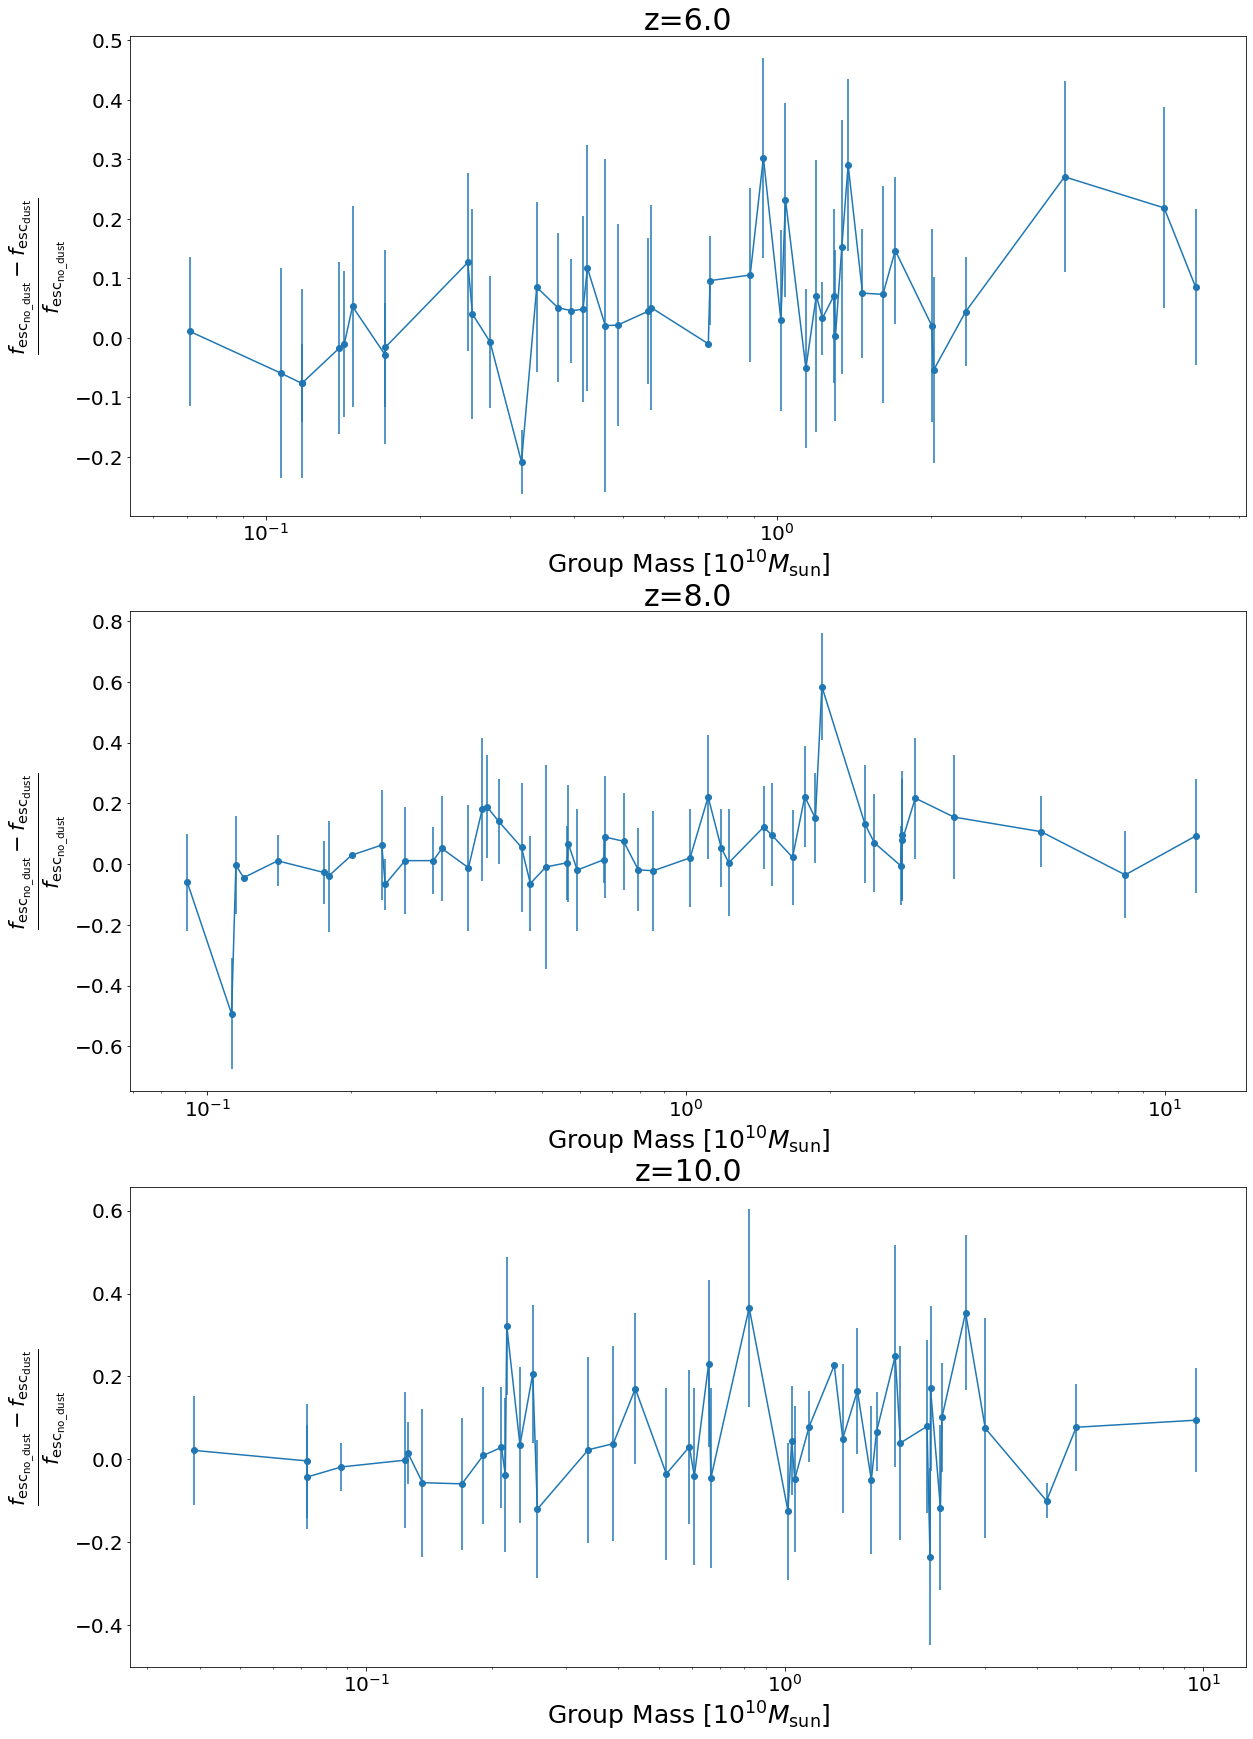

In [22]:
figure, subfigs = plt.subplots(len(halos['dust'].keys()))
for i,snap in enumerate(halos['dust'].keys()):
    dust_ids = set(halos['dust'][snap]['IDs'])
    no_dust_ids = set(halos['dust'][snap]['IDs'])
    IDs = list(dust_ids.intersection(no_dust_ids))
        
    for j,setting in enumerate(halos.keys()):
        mass = []
        f_esc = []
        error = []
        for ID in IDs:
            per_source = halos[setting][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['per_source']
            per_source = per_source[~np.isnan(per_source)]
            element_f_esc = np.median(per_source)
            element_mass = halos[setting][snap]['df'].loc[ID, ('GroupMass',0)]
            f_esc.append(element_f_esc)
            mass.append(element_mass)
            error.append(np.std(per_source))
            
        if setting == 'dust':
            f_esc_dust = np.array(f_esc)
        elif setting == 'no_dust': 
            f_esc_no_dust = np.array(f_esc)
    subfigs[i].scatter(np.array(mass),(f_esc_no_dust-f_esc_dust)/f_esc_no_dust)
    mass, esc_diff = zip(*sorted(zip(mass, (f_esc_no_dust-f_esc_dust)/f_esc_no_dust)))
    subfigs[i].errorbar(mass, esc_diff, yerr=error)
    subfigs[i].set_xscale('log')
    subfigs[i].set_xlabel('Group Mass [$10^{10}M_{\mathrm{sun}}$]', size='25')
    subfigs[i].set_ylabel(r'$\frac{f_{\mathrm{esc}_{\mathrm{no\_dust}}}-f_{\mathrm{esc}_{\mathrm{dust}}}}{f_{\mathrm{esc}_{\mathrm{no\_dust}}}}$', size='30')
    title = f'z={z[i]}'
    subfigs[i].set_title(title,fontsize=30)
plt.show();

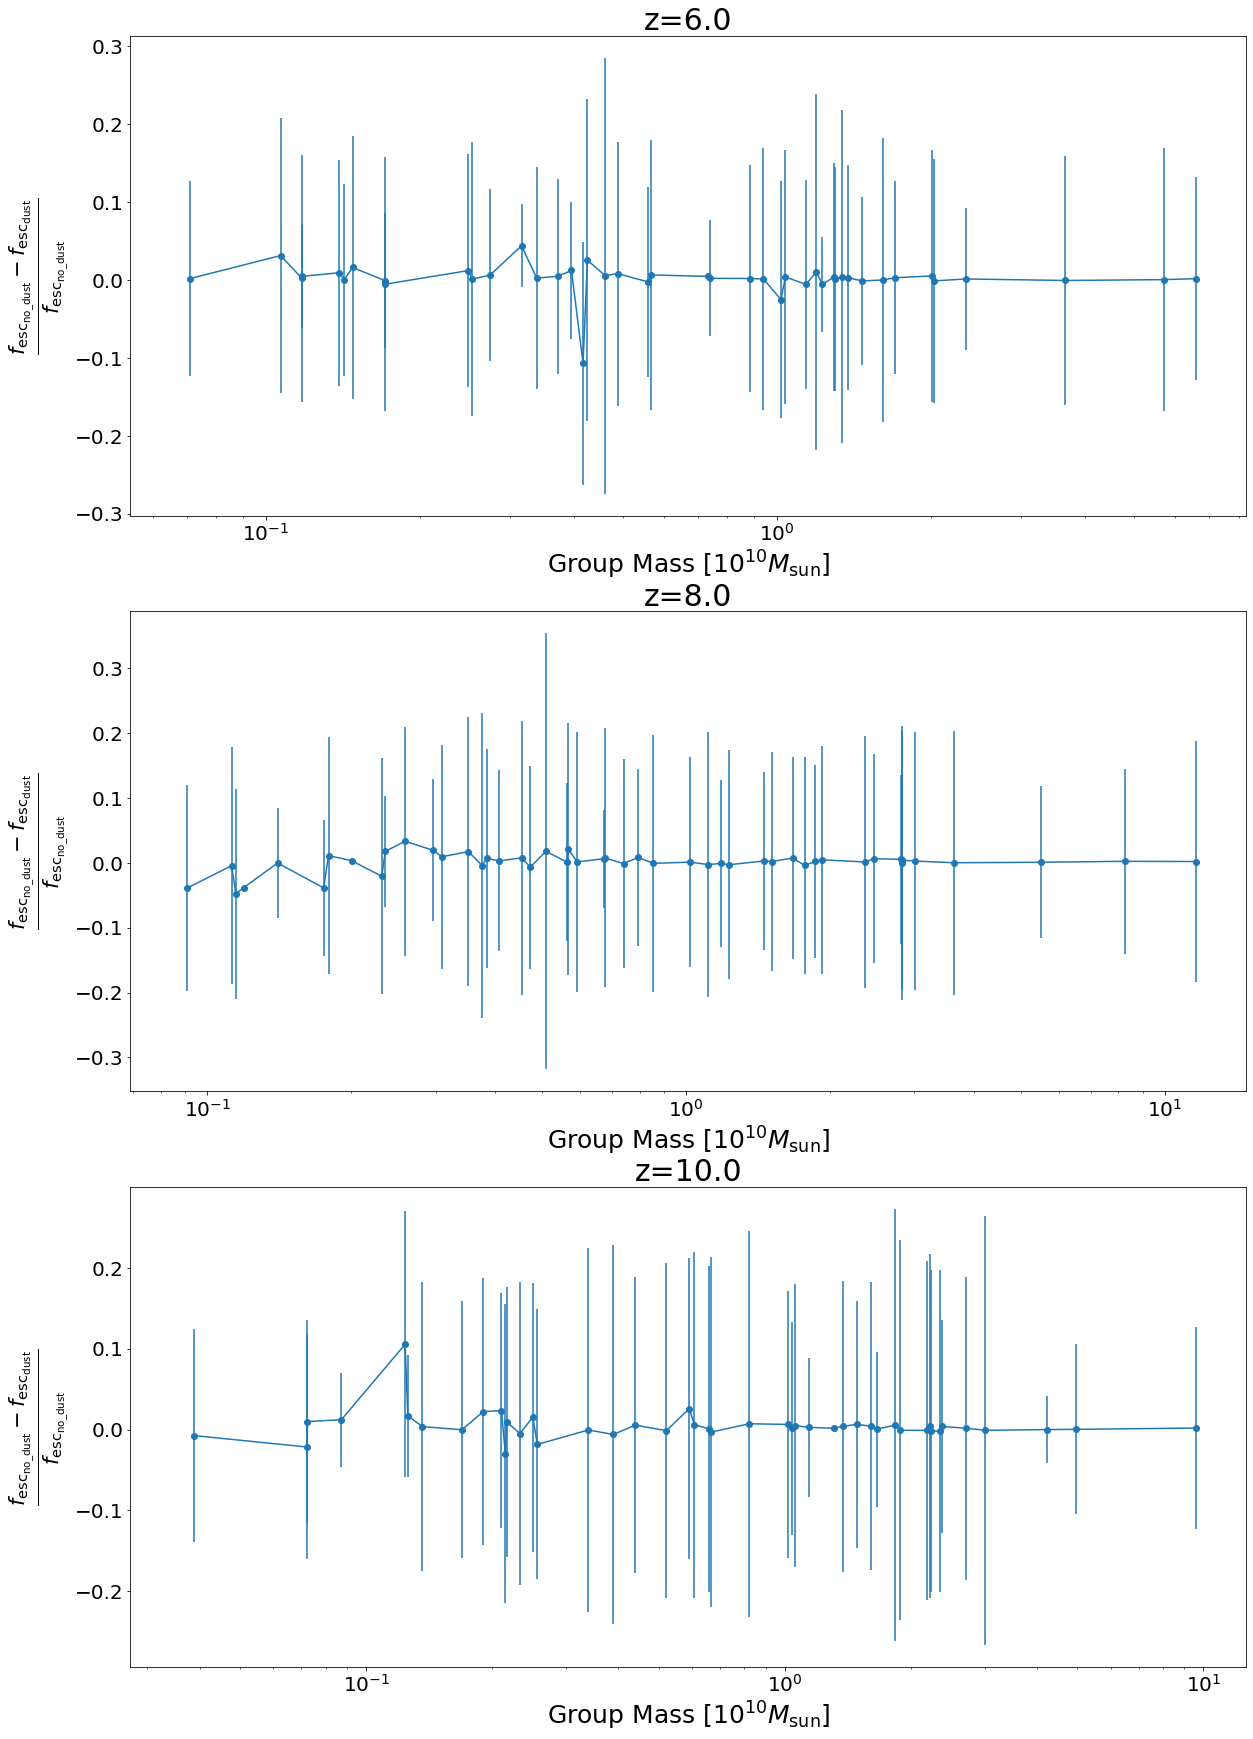

In [23]:
figure, subfigs = plt.subplots(len(halos['dust'].keys()))
for i,snap in enumerate(halos['dust'].keys()):
    dust_ids = set(halos['dust'][snap]['IDs'])
    no_dust_ids = set(halos['dust'][snap]['IDs'])
    IDs = list(dust_ids.intersection(no_dust_ids))
        
    for j,setting in enumerate(halos.keys()):
        mass = []
        f_esc = []
        error = []
        for ID in IDs:
            per_source = halos[setting][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['per_source']
            per_source = per_source[~np.isnan(per_source)]
            element_f_esc = np.average(per_source)
            error.append(np.std(per_source))
            element_mass = halos[setting][snap]['df'].loc[ID, ('GroupMass',0)]
            f_esc.append(element_f_esc)
            mass.append(element_mass)
            
        if setting == 'dust':
            f_esc_dust = np.array(f_esc)
        elif setting == 'no_dust': 
            f_esc_no_dust = np.array(f_esc)
    subfigs[i].scatter(np.array(mass),(f_esc_no_dust-f_esc_dust)/f_esc_no_dust)
    mass, esc_diff = zip(*sorted(zip(mass, (f_esc_no_dust-f_esc_dust)/f_esc_no_dust)))
    subfigs[i].errorbar(mass, esc_diff, yerr=error)
    subfigs[i].set_xscale('log')
    subfigs[i].set_xlabel('Group Mass [$10^{10}M_{\mathrm{sun}}$]', size='25')
    subfigs[i].set_ylabel(r'$\frac{f_{\mathrm{esc}_{\mathrm{no\_dust}}}-f_{\mathrm{esc}_{\mathrm{dust}}}}{f_{\mathrm{esc}_{\mathrm{no\_dust}}}}$', size='30')
    title = f'z={z[i]}'
    subfigs[i].set_title(title,fontsize=30)
plt.show();

sn013
smallest 0.07092815637588501 76621
largest 6.5884881019592285 124
0.07092816
6.588488
smallest 0.07092815637588501 76621
largest 6.5884881019592285 124
0.07092816
6.588488
sn008
0.09093688
11.592206
0.09093688
11.592206
sn004
smallest 0.038828399032354355 27586
0.0388284
9.575301
smallest 0.038828399032354355 27586
0.0388284
9.575301


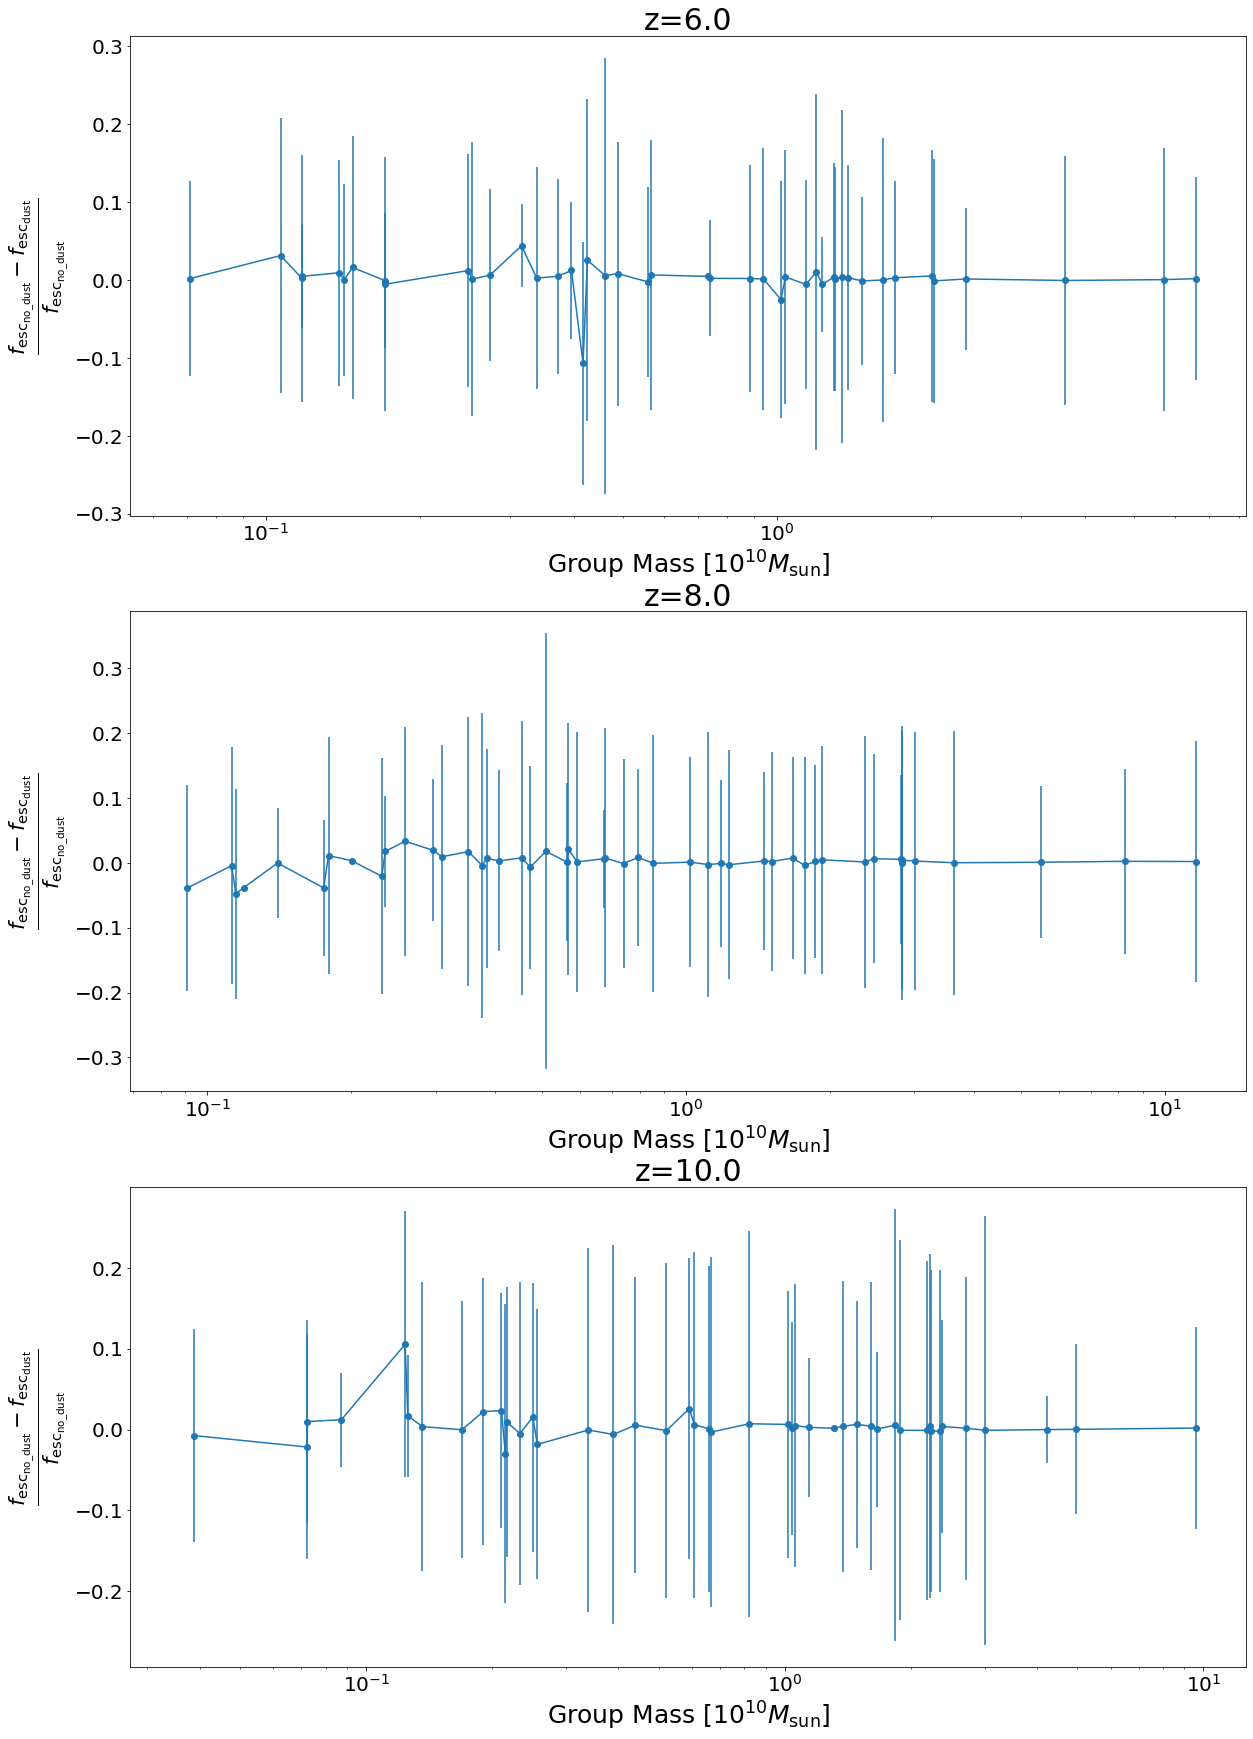

In [24]:
figure, subfigs = plt.subplots(len(halos['dust'].keys()))

for i,snap in enumerate(halos['dust'].keys()):
    dust_ids = set(halos['dust'][snap]['IDs'])
    no_dust_ids = set(halos['dust'][snap]['IDs'])
    IDs = list(dust_ids.intersection(no_dust_ids))
    print(snap)
        
    for j,setting in enumerate(halos.keys()):
        mass = []
        f_esc = []
        error = []
        for ID in IDs:
            per_source = halos[setting][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['per_source']
            per_source = per_source[~np.isnan(per_source)]
            element_f_esc = np.average(per_source)
            error.append(np.std(per_source))
            element_mass = halos[setting][snap]['df'].loc[ID, ('GroupMass',0)]
            f_esc.append(element_f_esc)
            mass.append(element_mass)
            if element_mass < 0.071:
                print(f'smallest {element_mass} {ID}')
                exit()
            if ID == 124:
                print(f'largest {element_mass} {ID}')

        if setting == 'dust':
            f_esc_dust = np.array(f_esc)
        elif setting == 'no_dust': 
            f_esc_no_dust = np.array(f_esc)
        
        print(np.min(mass))
        print(np.max(mass))
    subfigs[i].scatter(np.array(mass),(f_esc_no_dust-f_esc_dust)/f_esc_no_dust)
    mass, esc_diff = zip(*sorted(zip(mass, (f_esc_no_dust-f_esc_dust)/f_esc_no_dust)))
    subfigs[i].errorbar(mass, esc_diff, yerr=error)
    subfigs[i].set_xscale('log')
    subfigs[i].set_xlabel('Group Mass [$10^{10}M_{\mathrm{sun}}$]', size='25')
    subfigs[i].set_ylabel(r'$\frac{f_{\mathrm{esc}_{\mathrm{no\_dust}}}-f_{\mathrm{esc}_{\mathrm{dust}}}}{f_{\mathrm{esc}_{\mathrm{no\_dust}}}}$', size='30')
    title = f'z={z[i]}'
    subfigs[i].set_title(title,fontsize=30)
plt.show();

In [115]:
filter1 = ~halos['dust']['sn004']['df']['csim_path', 0].isnull()

In [127]:
halos['dust']['sn004']['df'][filter1][('GroupMass', 0)][-4:]

7440     0.087255
9982     0.072370
10426    0.072336
27586    0.038828
Name: (GroupMass, 0), dtype: float32

In [140]:
a = np.array([1,2,3,4,5])
b = np.array([1,2,3,4,5])
np.concatenate((a,b))

array([1, 2, 3, 4, 5, 1, 2, 3, 4, 5])

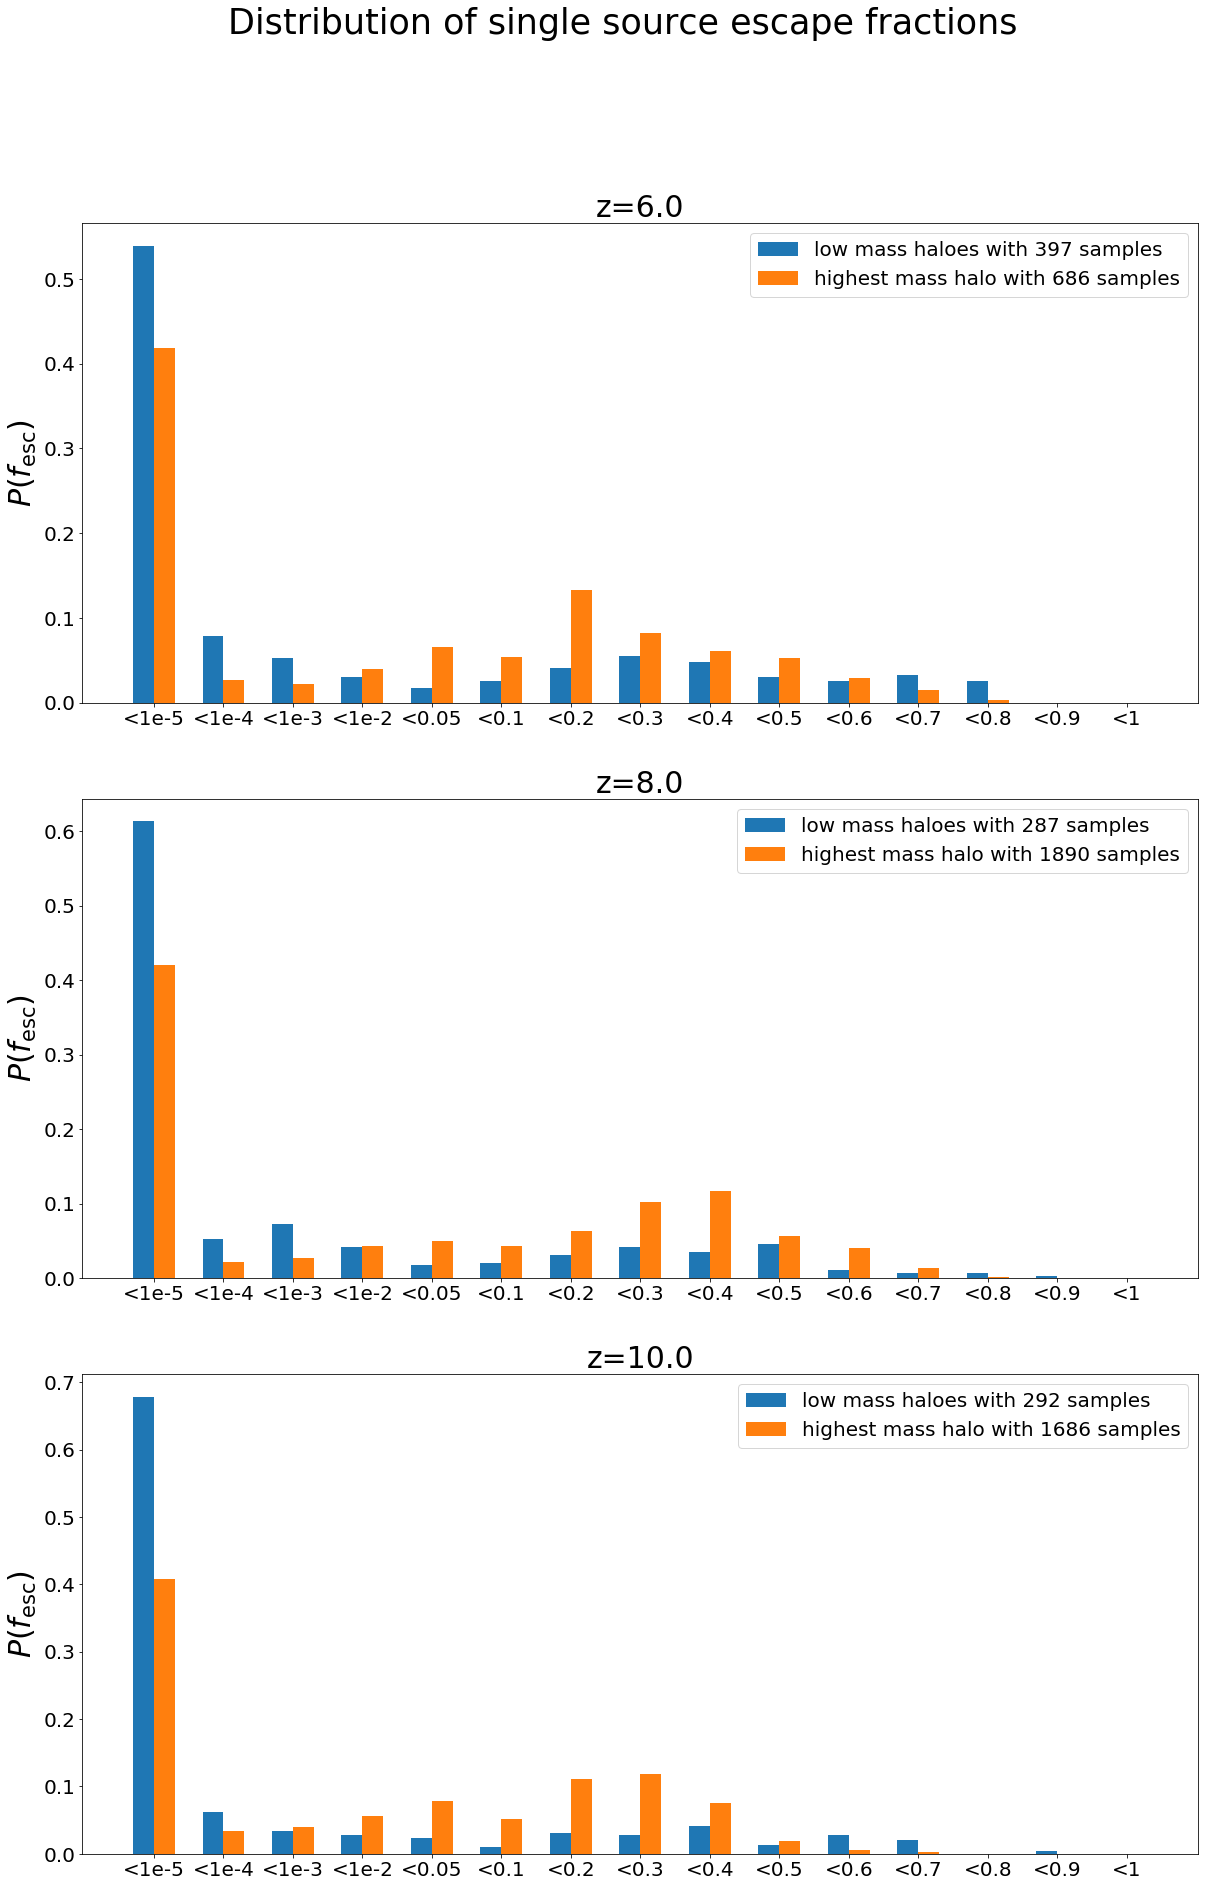

In [316]:
figure, subfigs = plt.subplots(len(halos['dust'].keys()))
bin_edges = [-np.inf, 1e-5, 1e-4, 1e-3, 1e-2, .05, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.]
labels = ['<1e-5', '<1e-4', '<1e-3', '<1e-2', '<0.05', '<0.1', '<0.2', '<0.3', '<0.4', '<0.5', '<0.6', '<0.7',
         '<0.8', '<0.9', '<1']
for i,snap in enumerate(halos['dust'].keys()):    
    IDs = halos['dust'][snap]['IDs']
    IDs.sort()
    f_esc_low = []
    for ID in IDs[-12:]:
        per_source = halos['no_dust'][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['per_source']
        per_source = per_source[~np.isnan(per_source)]

        f_esc_low = np.concatenate((np.array(f_esc_low), per_source))

    per_source = halos['no_dust'][snap]['df'].loc[IDs[0], ('f_esc',0)]['5.0e-2']['1.0e0']['per_source']

    f_esc_high = per_source[~np.isnan(per_source)]
      

    hist_low, _ = np.histogram(f_esc_low, bins=bin_edges)
    hist_high, _  = np.histogram(f_esc_high, bins=bin_edges) 

    low_sum = hist_low.sum()
    high_sum = hist_high.sum()

    subfigs[i].bar(np.arange(hist_low.size)-0.15,hist_low/low_sum, label=f'low mass haloes with {low_sum} samples', width = 0.3)
    subfigs[i].bar(np.arange(hist_low.size)+0.15,hist_high/high_sum, label = f'highest mass halo with {high_sum} samples', width = 0.3)

    subfigs[i].legend(fontsize=20)

    subfigs[i].set_xticks(np.arange(len(labels)))
    #subfigs[i].set_xlabel('Group Mass [$10^{10}M_{\mathrm{sun}}$]', size='25')
    subfigs[i].set_ylabel(r'$P(f_\mathrm{esc})$', size='30')
    subfigs[i].set_xticklabels(labels)
    title = f'z={z[i]}'
    subfigs[i].set_title(title,fontsize=30)
   
figure.suptitle('Distribution of single source escape fractions', fontsize=35)
plt.show();


In [287]:
def get_bin_widths(edges):
    widths = []
    for i in range(edges.size-1):
        widths.append(edges[i+1]-edges[i])
    return np.array(widths)

In [289]:
path = '/freya/ptmp/mpa/mglatzle/TNG_f_esc/fid2/db/SPECTRA/L35n2160TNG/sn004/g36/101286534307_r65.ps'

bin_edges = np.loadtxt(path, skiprows=1)[:,0]
widths = get_bin_widths(bin_edges)

chunk_size = int(halos['dust']['sn004']['df'].loc[0, ('f_esc',0)]['5.0e-2']['1.0e0']['chunk_size'])

n_it = int(halos['dust']['sn004']['df'].loc[IDs[10], ('f_esc',0)]['5.0e-2']['1.0e0']['n_iterations'])

In [258]:
em = np.sum(halos['dust']['sn004']['df'].loc[0, ('f_esc',0)]['5.0e-2']['1.0e0']['emitted_photons'], axis=1)

In [259]:
escaped = np.sum(halos['dust']['sn004']['df'].loc[0, ('f_esc',0)]['5.0e-2']['1.0e0']['escaped_photons'], axis=1)

In [283]:
freqs = halos['dust']['sn004']['df'].loc[0, ('f_esc',0)]['5.0e-2']['1.0e0']['freqs']

In [284]:
energies = halos['dust']['sn004']['df'].loc[0, ('f_esc',0)]['5.0e-2']['1.0e0']['freqs']*h/e

In [336]:
a = freqs.reshape((freqs.size, 1))

In [337]:
a.shape

(65, 1)

In [356]:
def number_sed(counts, n_it, chunk_size, freqs=freqs, widths=widths):
    freqs_by_widths = freqs/widths
    return counts*h*freqs_by_widths[:,None]*norm*j_to_erg/n_it/chunk_size

In [357]:
em_dens = em*h*freqs*norm*j_to_erg/widths/n_it/chunk_size

ValueError: operands could not be broadcast together with shapes (65,98) (65,) 

In [358]:
esc_dens = escaped*h*freqs*norm*j_to_erg/widths/n_it/chunk_size

0.013475719960228082
0.20950345207092466
5.213439936394804e-05
0.004541796071392848
0.2129388993094949
0.028520450702623067
0.016519208563543997
0.0003212524067505528
0.00078542712453572
0.004762851914421309
0.004801395449341526
-------------------------------------
0.16180448202627182
0.04639814205678901
0.0614316086327325
0.2129388993094949
-------------------------------------
0.0025305035548943704
0.24461352900220165
0.06131858838856798
0.01946511536043611
0.09450915938347618
0.00085511203913717
0.04403037913841059
1.5396512052681245e-05
3.442595073463772e-05
0.21603334397062107
0.0051060302372985715
-------------------------------------
0.09096791350618459
0.038822954985453934
0.050286373601203804
0.09450915938347618
-------------------------------------
0.0258507709076437
0.0008905720119443173
0.43194115585657183
0.13774561499609667
0.09227152576644423
0.22194395232419104
0.1587736454658066
0.3691276962311539
0.015208364905280748
3.479205475381223e-06
0.0011532983101922004
------

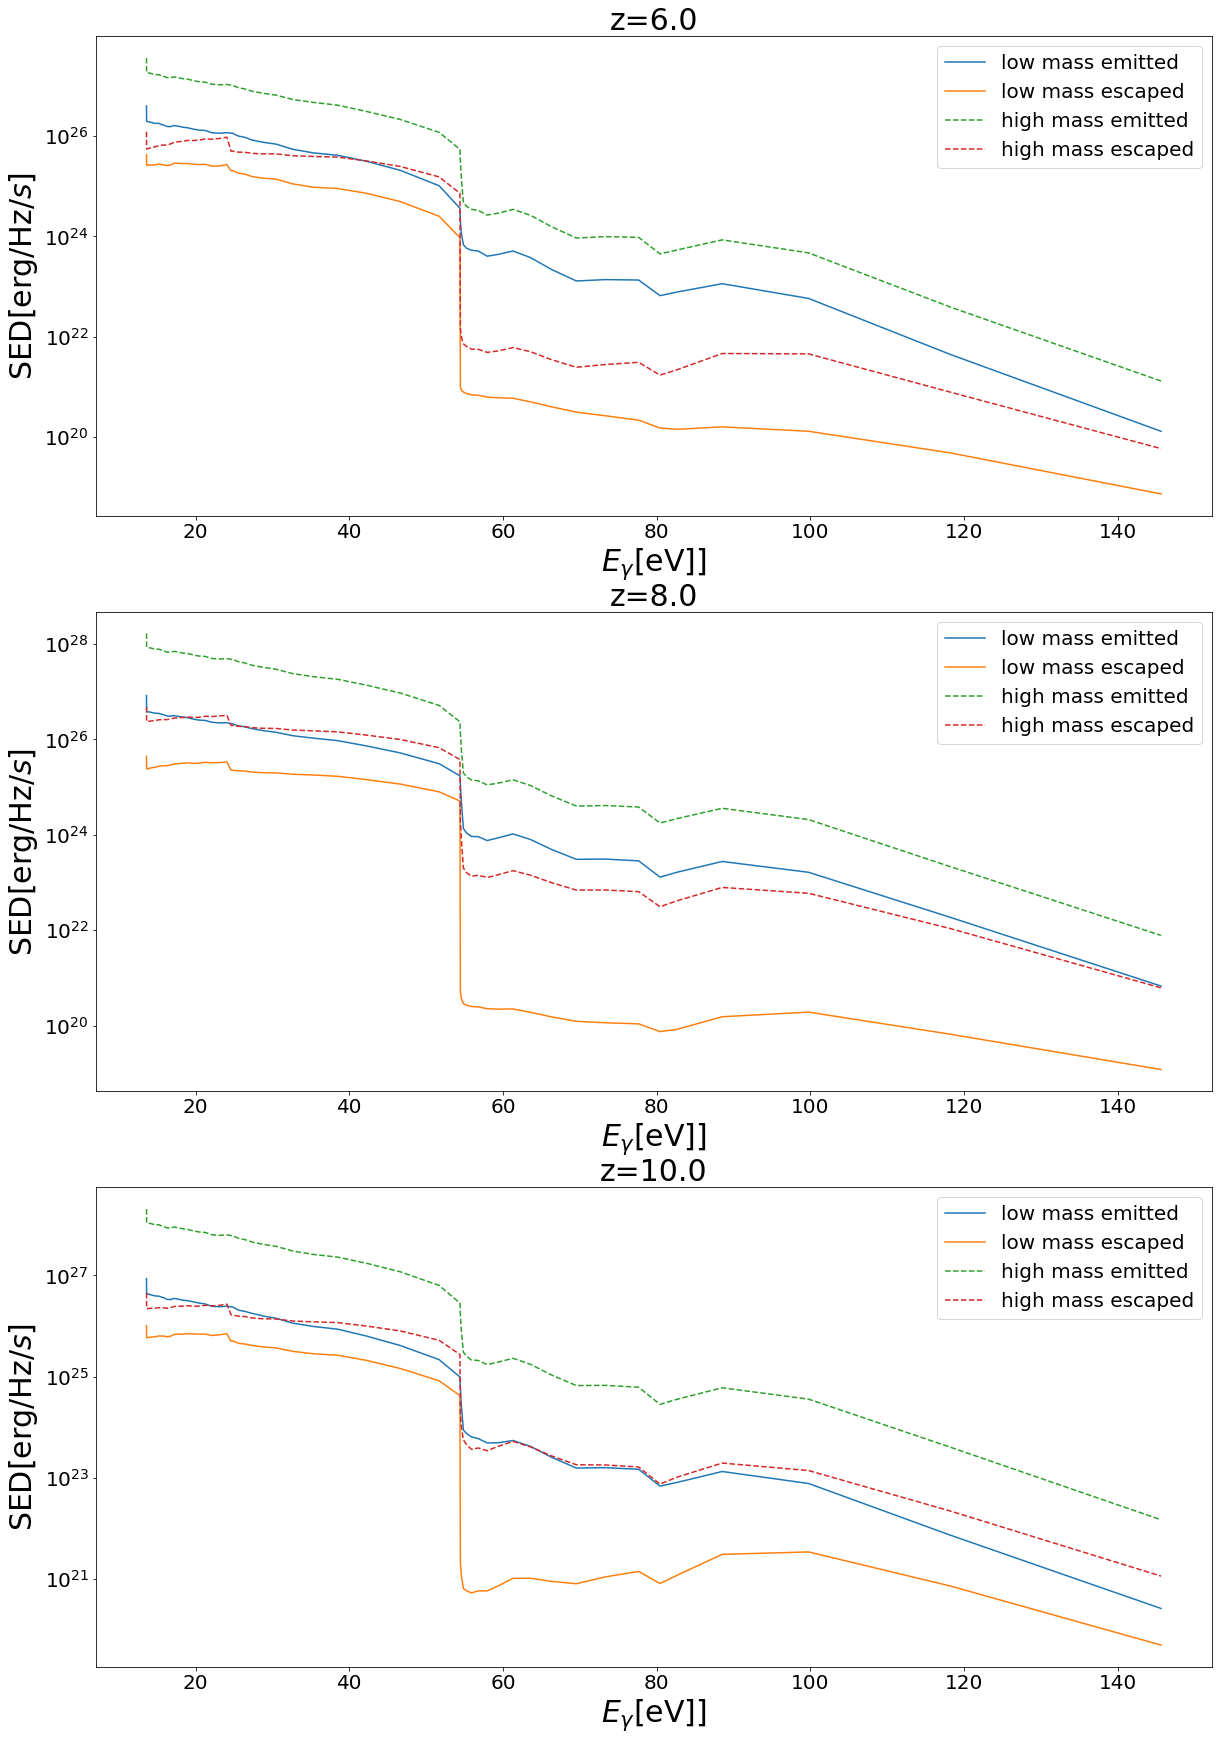

In [380]:
figure, subfigs = plt.subplots(len(halos['dust'].keys()))

for i,snap in enumerate(halos['dust'].keys()):    
    IDs = halos['no_dust'][snap]['IDs']
    IDs.sort()
    em_low = halos['no_dust'][snap]['df'].loc[IDs[-12], ('f_esc',0)]['5.0e-2']['1.0e0']['emitted_photons']
    esc_low = halos['no_dust'][snap]['df'].loc[IDs[-12], ('f_esc',0)]['5.0e-2']['1.0e0']['escaped_photons']
    for ID in IDs[-11:]:
        em = halos['no_dust'][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['emitted_photons']
        esc = halos['no_dust'][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['escaped_photons']
        print(halos['no_dust'][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['cum'])
        
        n_it = halos['no_dust'][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['n_iterations']
        chunk_size = halos['no_dust'][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['chunk_size']
        
        em = number_sed(em, n_it, chunk_size)
        esc = number_sed(esc, n_it, chunk_size)
        
        em_low = np.concatenate((np.array(em_low), em), axis=1)
        esc_low = np.concatenate((np.array(esc_low), esc), axis=1)

    em_high = halos['no_dust'][snap]['df'].loc[IDs[0], ('f_esc',0)]['5.0e-2']['1.0e0']['emitted_photons']
    esc_high = halos['no_dust'][snap]['df'].loc[IDs[0], ('f_esc',0)]['5.0e-2']['1.0e0']['escaped_photons']
    
    n_it = halos['no_dust'][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['n_iterations']
    chunk_size = halos['no_dust'][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['chunk_size']
    
    em_high = number_sed(em_high, n_it, chunk_size)
    esc_high = number_sed(esc_high, n_it, chunk_size)
    
    em_low_cum = np.sum(em_low, axis=1)
    esc_low_cum = np.sum(esc_low, axis=1)
    
    em_high_cum = np.sum(em_high, axis=1)
    esc_high_cum = np.sum(esc_high, axis=1)
    
    print('-------------------------------------')
    print(esc_low_cum.sum()/em_low_cum.sum())
    print(esc_high_cum.sum()/em_high_cum.sum())
    print(halos['no_dust'][snap]['df'].loc[IDs[0], ('f_esc',0)]['5.0e-2']['1.0e0']['cum'])
    print(halos['no_dust'][snap]['df'].loc[IDs[-7], ('f_esc',0)]['5.0e-2']['1.0e0']['cum'])
    print('-------------------------------------')

    subfigs[i].plot(energies, em_low_cum, label='low mass emitted')
    subfigs[i].plot(energies, esc_low_cum, label='low mass escaped')
    subfigs[i].plot(energies, em_high_cum, '--', label='high mass emitted')
    subfigs[i].plot(energies, esc_high_cum, '--', label='high mass escaped')

    subfigs[i].legend(fontsize=20)

    subfigs[i].set_yscale('log')
    subfigs[i].set_xlabel('$E_\gamma[\mathrm{eV}]]$', size='30')
    subfigs[i].set_ylabel(r'SED$[\mathrm{erg}/\mathrm{Hz}/s]$', size='30')
    title = f'z={z[i]}'
    subfigs[i].set_title(title,fontsize=30)
   
#figure.suptitle('Distribution of single source escape fractions', fontsize=35)
plt.show();

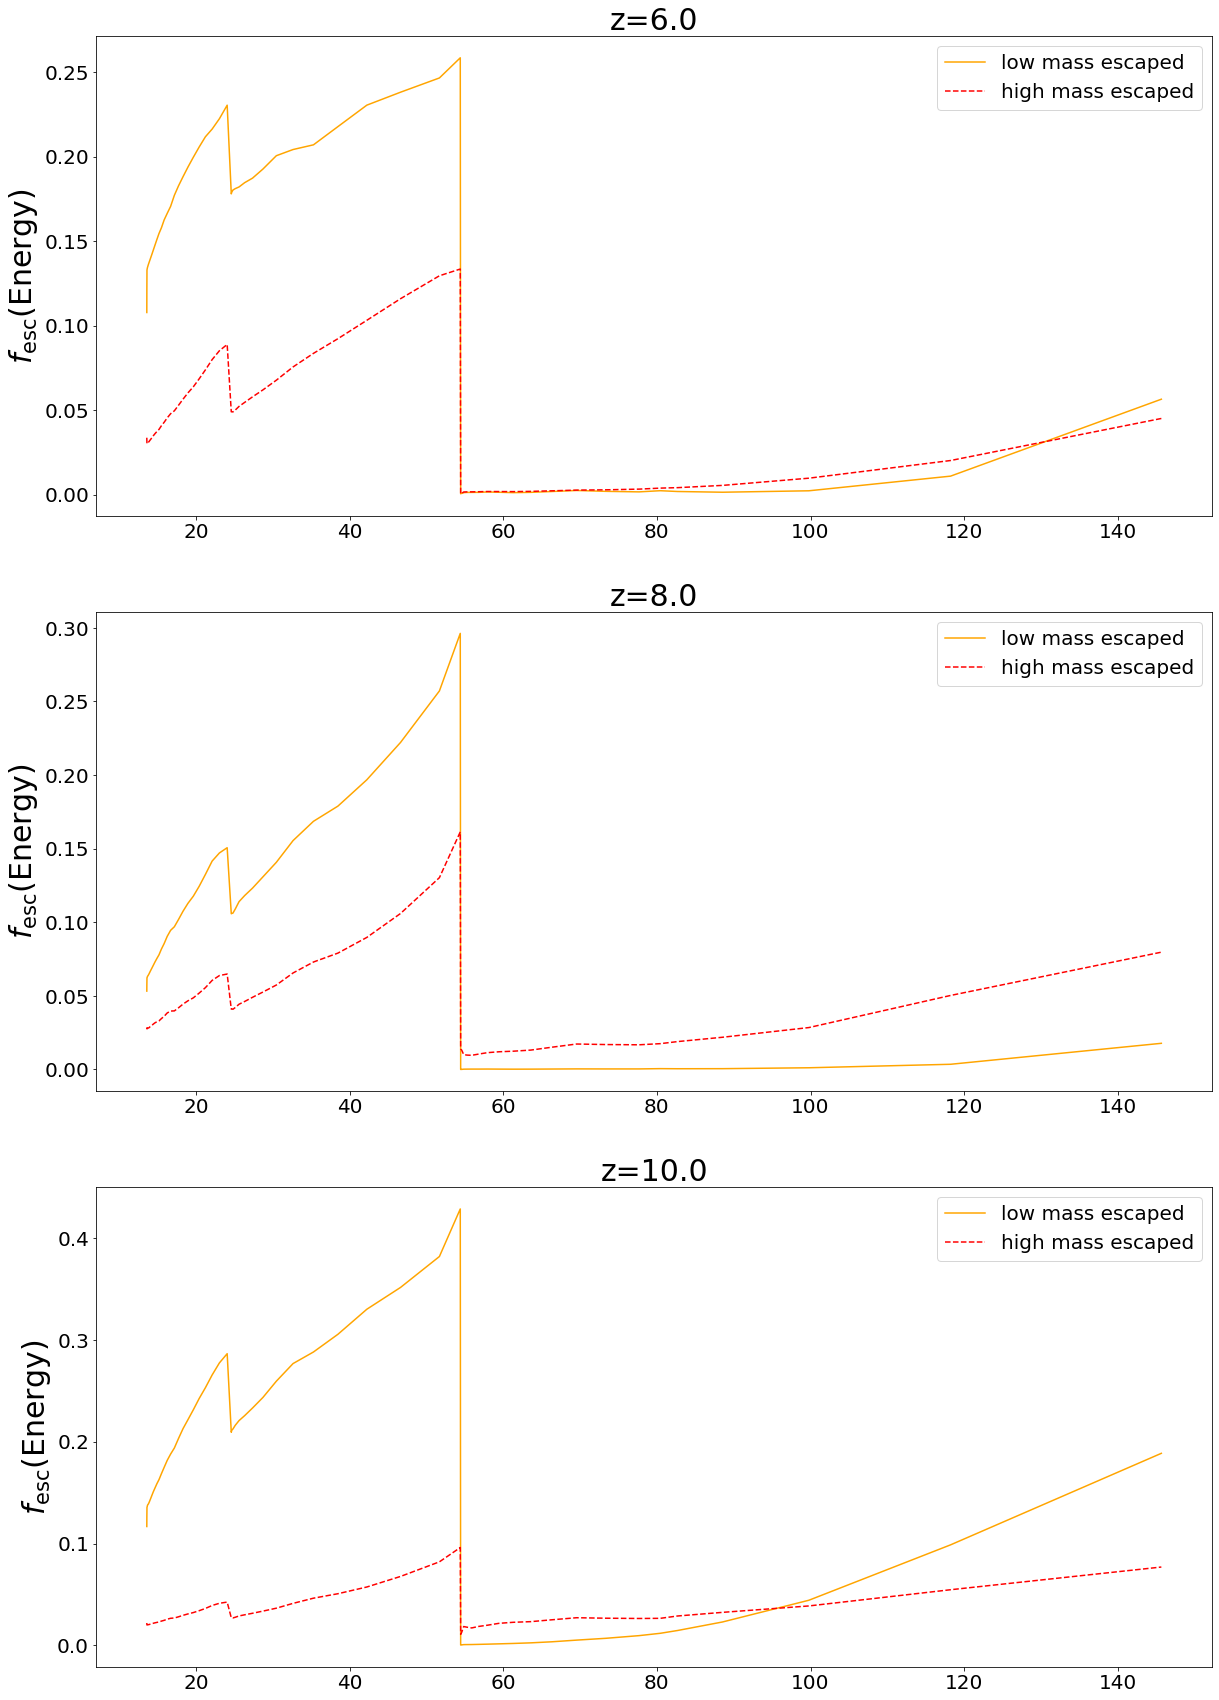

In [388]:
figure, subfigs = plt.subplots(len(halos['dust'].keys()))

for i,snap in enumerate(halos['dust'].keys()):    
    IDs = halos['no_dust'][snap]['IDs']
    IDs.sort()
    em_low = halos['no_dust'][snap]['df'].loc[IDs[-12], ('f_esc',0)]['5.0e-2']['1.0e0']['emitted_photons']
    esc_low = halos['no_dust'][snap]['df'].loc[IDs[-12], ('f_esc',0)]['5.0e-2']['1.0e0']['escaped_photons']
    for ID in IDs[-11:]:
        em = halos['no_dust'][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['emitted_photons']
        esc = halos['no_dust'][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['escaped_photons']
        
        n_it = halos['no_dust'][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['n_iterations']
        chunk_size = halos['no_dust'][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['chunk_size']
        
        em = number_sed(em, n_it, chunk_size)
        esc = number_sed(esc, n_it, chunk_size)
        
        em_low = np.concatenate((np.array(em_low), em), axis=1)
        esc_low = np.concatenate((np.array(esc_low), esc), axis=1)

    em_high = halos['no_dust'][snap]['df'].loc[IDs[0], ('f_esc',0)]['5.0e-2']['1.0e0']['emitted_photons']
    esc_high = halos['no_dust'][snap]['df'].loc[IDs[0], ('f_esc',0)]['5.0e-2']['1.0e0']['escaped_photons']
    
    n_it = halos['no_dust'][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['n_iterations']
    chunk_size = halos['no_dust'][snap]['df'].loc[ID, ('f_esc',0)]['5.0e-2']['1.0e0']['chunk_size']
    
    em_high = number_sed(em_high, n_it, chunk_size)
    esc_high = number_sed(esc_high, n_it, chunk_size)
    
    em_low_cum = np.sum(em_low, axis=1)
    esc_low_cum = np.sum(esc_low, axis=1)
    
    em_high_cum = np.sum(em_high, axis=1)
    esc_high_cum = np.sum(esc_high, axis=1)

    subfigs[i].plot(energies, esc_low_cum/em_low_cum, 'orange', label='low mass escaped')
    subfigs[i].plot(energies, esc_high_cum/em_high_cum, 'r--', label='high mass escaped')

    subfigs[i].legend(fontsize=20)

    #subfigs[i].set_xlabel('Group Mass [$10^{10}M_{\mathrm{sun}}$]', size='25')
    subfigs[i].set_ylabel(r'$f_\mathrm{esc}(\mathrm{Energy})$', size='30')
    title = f'z={z[i]}'
    subfigs[i].set_title(title,fontsize=30)
   
#figure.suptitle('Distribution of single source escape fractions', fontsize=35)
plt.show();

In [381]:
a_init = 1100 
Omega_m0 = 0.3
Omega_Lambda0 = 0.7
H0_over_h = 1e5
m_p = 1.6726e-27
k_b = 1.380649e-23
O_b_by_O_m = 0.16

In [383]:
5.*k_b*3000/(3.*m_p*O_b_by_O_m*H0_over_h*H0_over_h)/1100

2.3450306680943113e-05